# **Importing the needed libraries**

In [ ]:
#load/install necessary libraries
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)
install.packages("gridExtra")
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# **Diabetes Preprocessing**

In [ ]:
data <- read.csv("diabetes_dataset.csv")

In [ ]:
#display dataset structure
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [ ]:
#display first few rows of the dataset
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
#checking for missing values
missing_values <- colSums(is.na(data))
print(missing_values)

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [ ]:
#checking for duplicate rows
duplicates <- sum(duplicated(data))
print(paste("Number of duplicate rows:", duplicates))

[1] "Number of duplicate rows: 0"


In [ ]:
#converting outcome to a factor with appropriate labels to avoid it's error
data$Outcome <- factor(data$Outcome, levels = c(0, 1), labels = c("Non-Diabetic", "Diabetic"))

In [ ]:
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,6,148,72,35,0,33.6,0.627,50,Diabetic
2,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
3,8,183,64,0,0,23.3,0.672,32,Diabetic
4,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
5,0,137,40,35,168,43.1,2.288,33,Diabetic
6,5,116,74,0,0,25.6,0.201,30,Non-Diabetic


#**Part 1: Exploratory Analysis**

## **1. Average glucose levels among patients with and without diabetes**

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)

# A tibble: 2 × 2
  Outcome      Average_Glucose
  <fct>                  <dbl>
1 Non-Diabetic            110.
2 Diabetic                141.


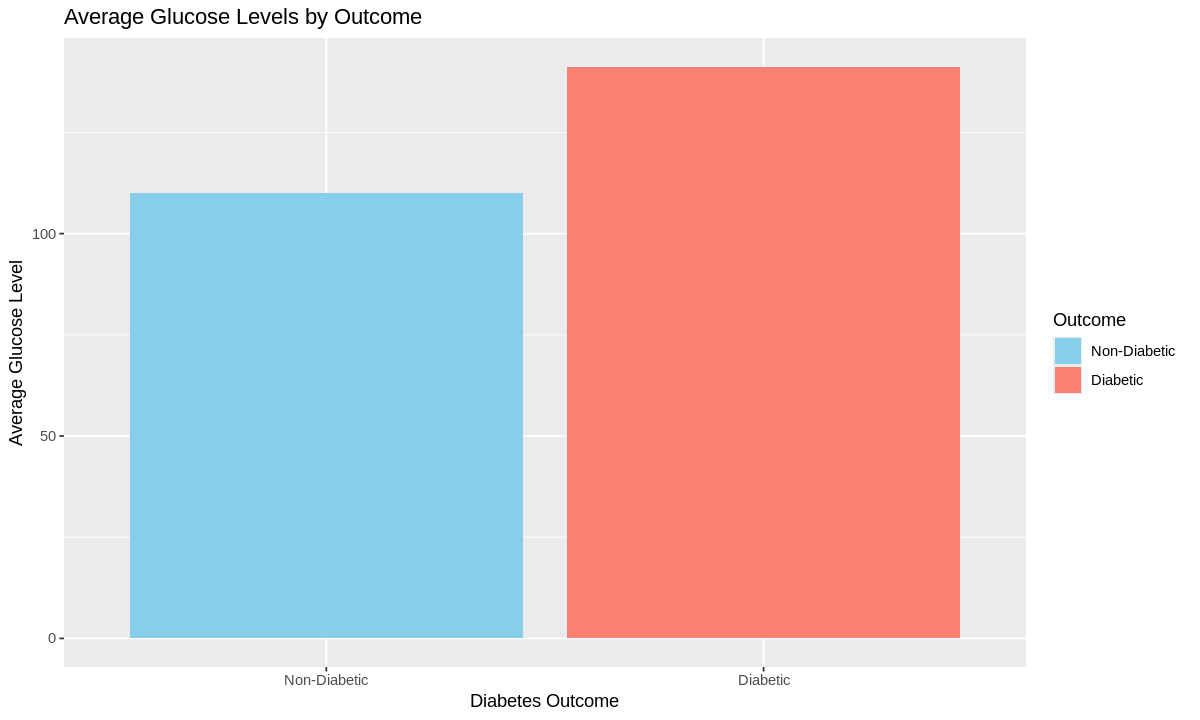

In [ ]:
avg_glucose <- data %>%
  group_by(Outcome) %>%
  summarise(Average_Glucose = mean(Glucose))
print(avg_glucose)

ggplot(avg_glucose, aes(x = Outcome, y = Average_Glucose, fill = Outcome)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Glucose Levels by Outcome",
       x = "Diabetes Outcome",
       y = "Average Glucose Level") +
  scale_fill_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "salmon"))

## **2. Average age of patients with and without diabetes**


# A tibble: 2 × 2
  Outcome      Average_Age
  <fct>              <dbl>
1 Non-Diabetic        31.2
2 Diabetic            37.1


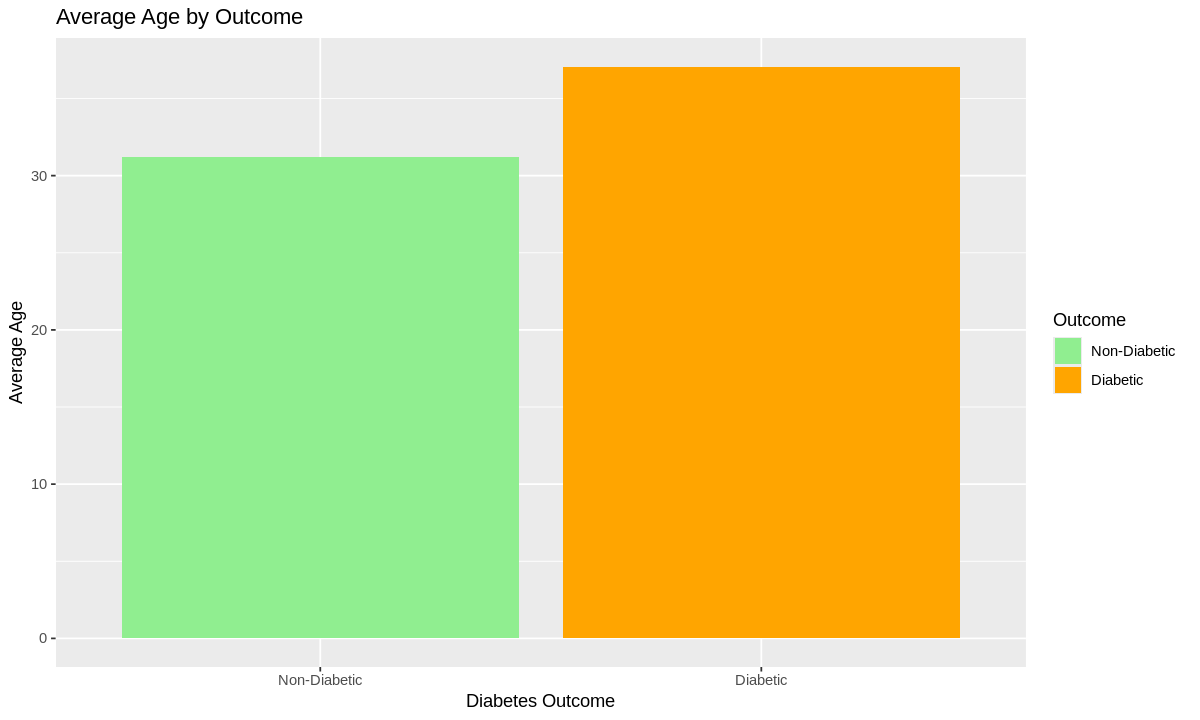

In [ ]:
avg_age <- data %>% group_by(Outcome) %>% summarise(Average_Age = mean(Age))
print(avg_age)
ggplot(avg_age, aes(x = Outcome, y = Average_Age, fill = Outcome)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Age by Outcome", x = "Diabetes Outcome", y = "Average Age") +
  scale_fill_manual(values = c("Non-Diabetic" = "lightgreen", "Diabetic" = "orange"))

## **3. Average blood pressure measurements across diabetic and non-diabetic groups**

# A tibble: 2 × 2
  Outcome      Average_BloodPressure
  <fct>                        <dbl>
1 Non-Diabetic                  68.2
2 Diabetic                      70.8


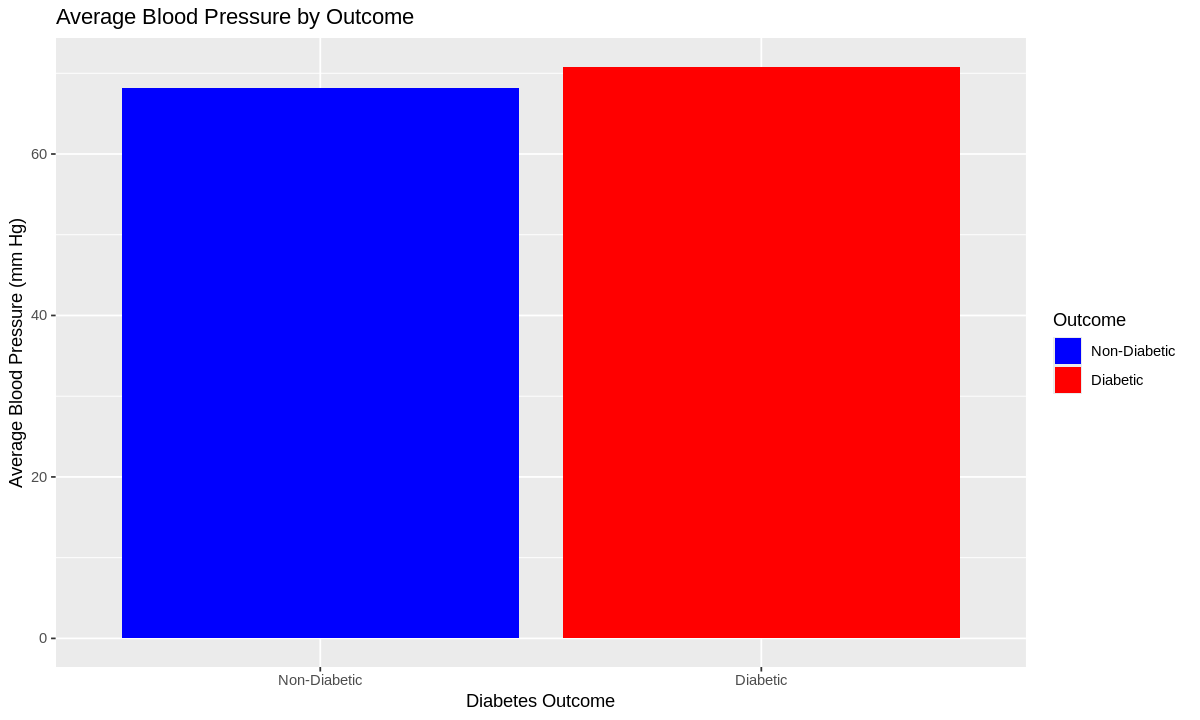

In [ ]:
avg_bp <- data %>% group_by(Outcome) %>% summarise(Average_BloodPressure = mean(BloodPressure))
print(avg_bp)
ggplot(avg_bp, aes(x = Outcome, y = Average_BloodPressure, fill = Outcome)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Blood Pressure by Outcome", x = "Diabetes Outcome", y = "Average Blood Pressure (mm Hg)") +
  scale_fill_manual(values = c("Non-Diabetic" = "blue", "Diabetic" = "red"))

## **4. Average BMI of diabetic versus non-diabetic patients**


# A tibble: 2 × 2
  Outcome      Average_BMI
  <fct>              <dbl>
1 Non-Diabetic        30.3
2 Diabetic            35.1


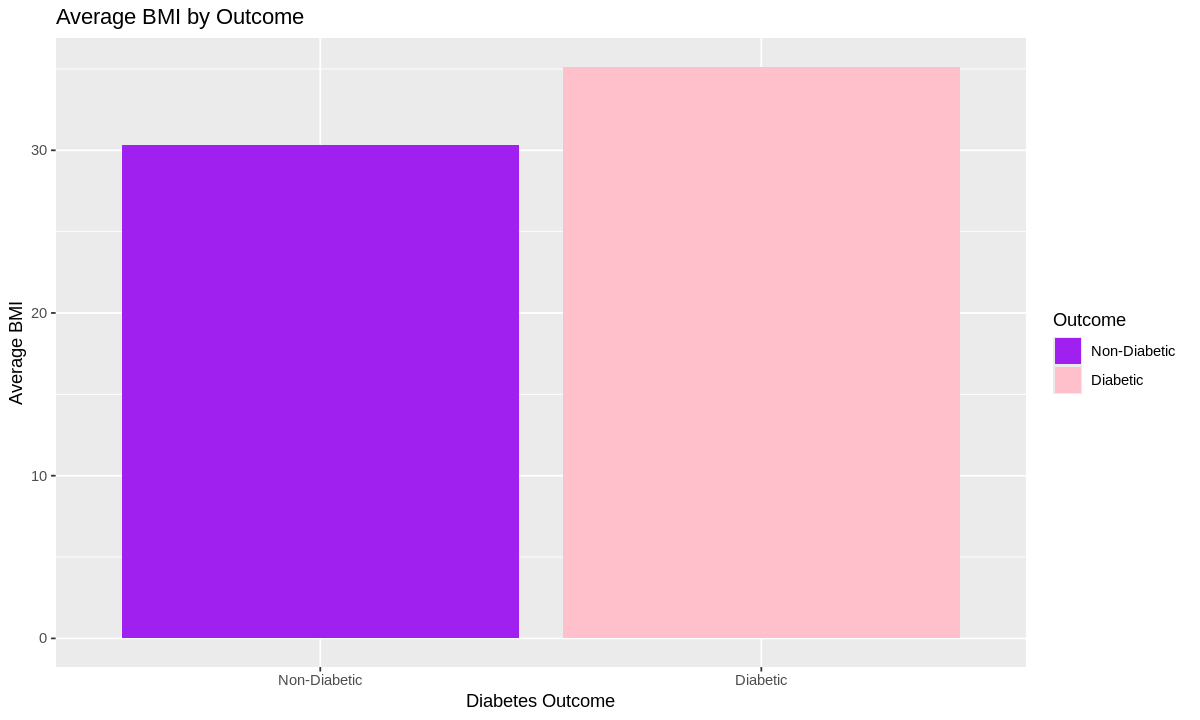

In [ ]:
avg_bmi <- data %>% group_by(Outcome) %>% summarise(Average_BMI = mean(BMI))
print(avg_bmi)
ggplot(avg_bmi, aes(x = Outcome, y = Average_BMI, fill = Outcome)) +
  geom_bar(stat = "identity") +
  labs(title = "Average BMI by Outcome", x = "Diabetes Outcome", y = "Average BMI") +
  scale_fill_manual(values = c("Non-Diabetic" = "purple", "Diabetic" = "pink"))

## **5. Rate of diabetes among patients in the dataset**

  Diabetes_Rate
1     0.3489583


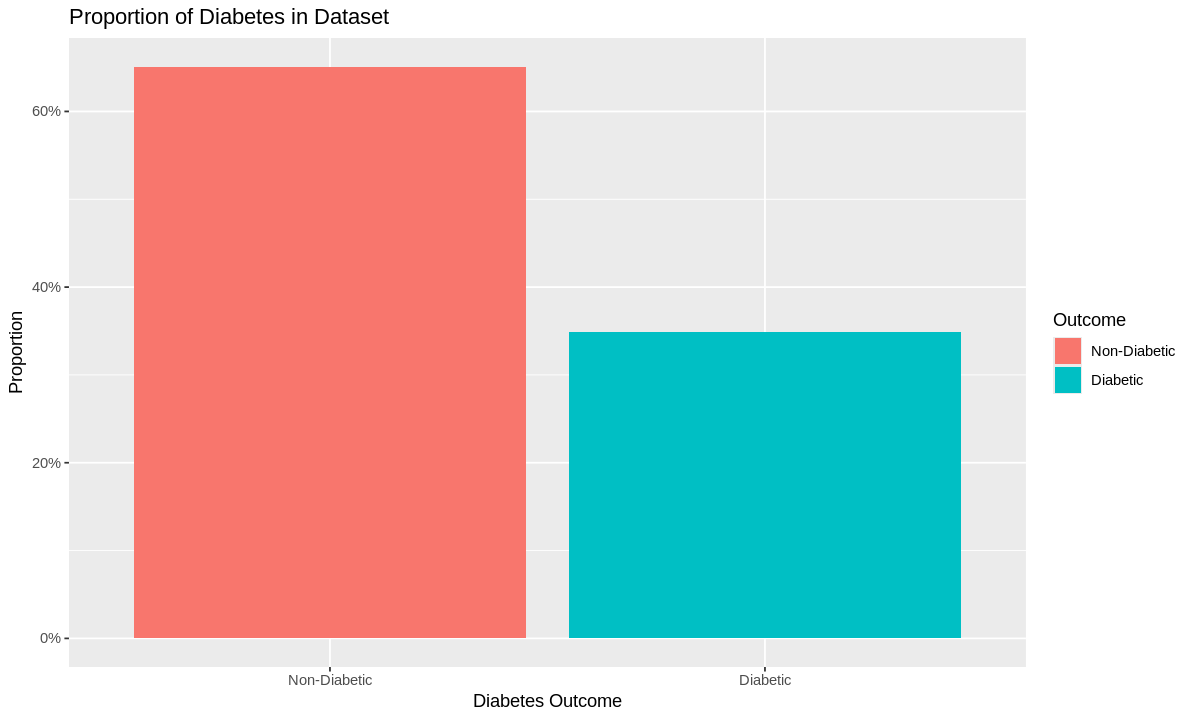

In [ ]:
diabetes_rate <- data %>% summarise(Diabetes_Rate = mean(as.numeric(Outcome) - 1))
print(diabetes_rate)
ggplot(data, aes(x = Outcome, fill = Outcome)) +
  geom_bar(aes(y = ..count../sum(..count..)), stat = "count") +
  labs(title = "Proportion of Diabetes in Dataset", x = "Diabetes Outcome", y = "Proportion") +
  scale_y_continuous(labels = scales::percent)

## **6. Distribution of BMI values among all patients**

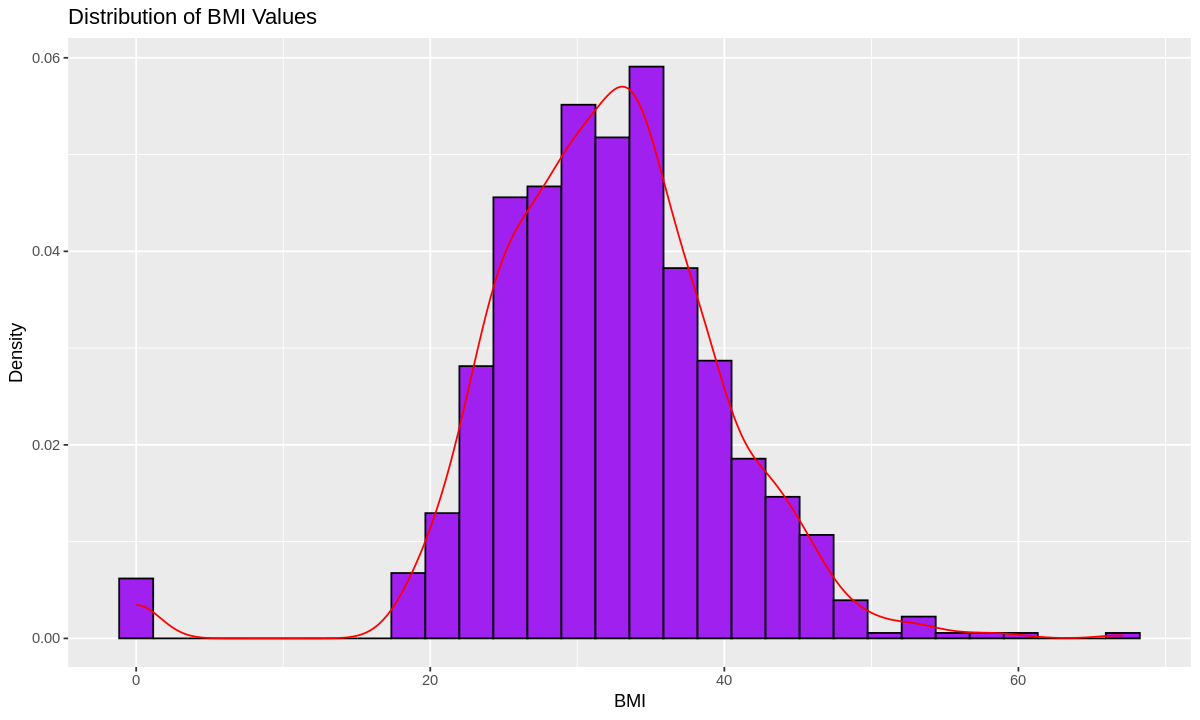

In [ ]:
ggplot(data, aes(x = BMI)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "purple", color = "black") +
  geom_density(color = "red") +
  labs(title = "Distribution of BMI Values", x = "BMI", y = "Density")

## **7. Distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients**


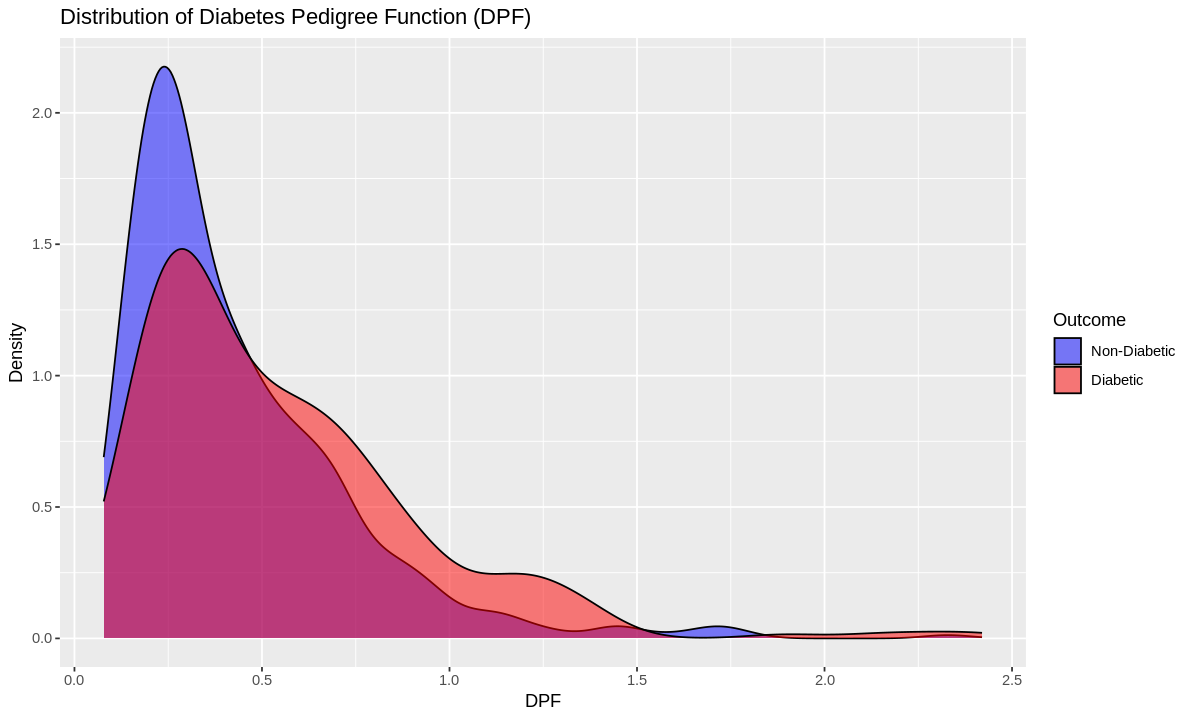

In [ ]:
ggplot(data, aes(x = DiabetesPedigreeFunction, fill = Outcome)) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Diabetes Pedigree Function (DPF)", x = "DPF", y = "Density") +
  scale_fill_manual(values = c("Non-Diabetic" = "blue", "Diabetic" = "red"))

## **8. Relationship between the number of pregnancies and diabetes occurrence**


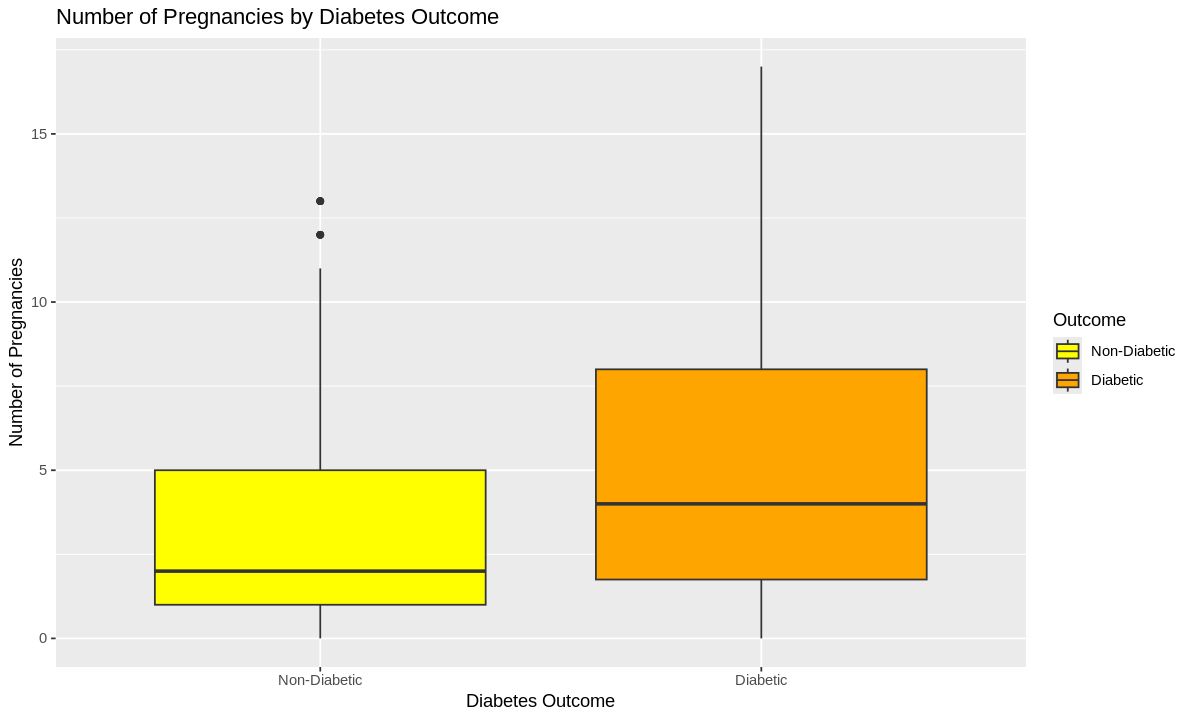

In [ ]:
ggplot(data, aes(x = Outcome, y = Pregnancies, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Number of Pregnancies by Diabetes Outcome", x = "Diabetes Outcome", y = "Number of Pregnancies") +
  scale_fill_manual(values = c("Non-Diabetic" = "yellow", "Diabetic" = "orange"))

## **9. Correlation between glucose levels and BMI**

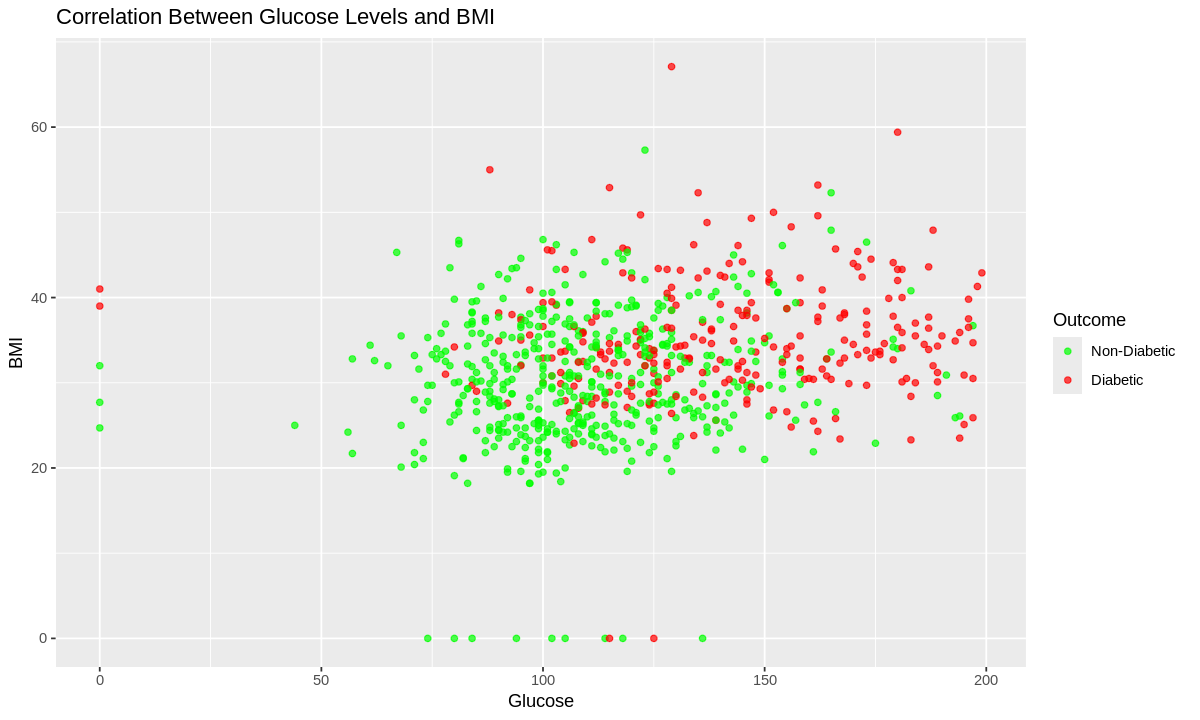

In [ ]:
ggplot(data, aes(x = Glucose, y = BMI, color = Outcome)) +
  geom_point(alpha = 0.7) +
  labs(title = "Correlation Between Glucose Levels and BMI", x = "Glucose", y = "BMI") +
  scale_color_manual(values = c("Non-Diabetic" = "green", "Diabetic" = "red"))

## **10. Trend of glucose levels with age among diabetic and non-diabetic patients**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


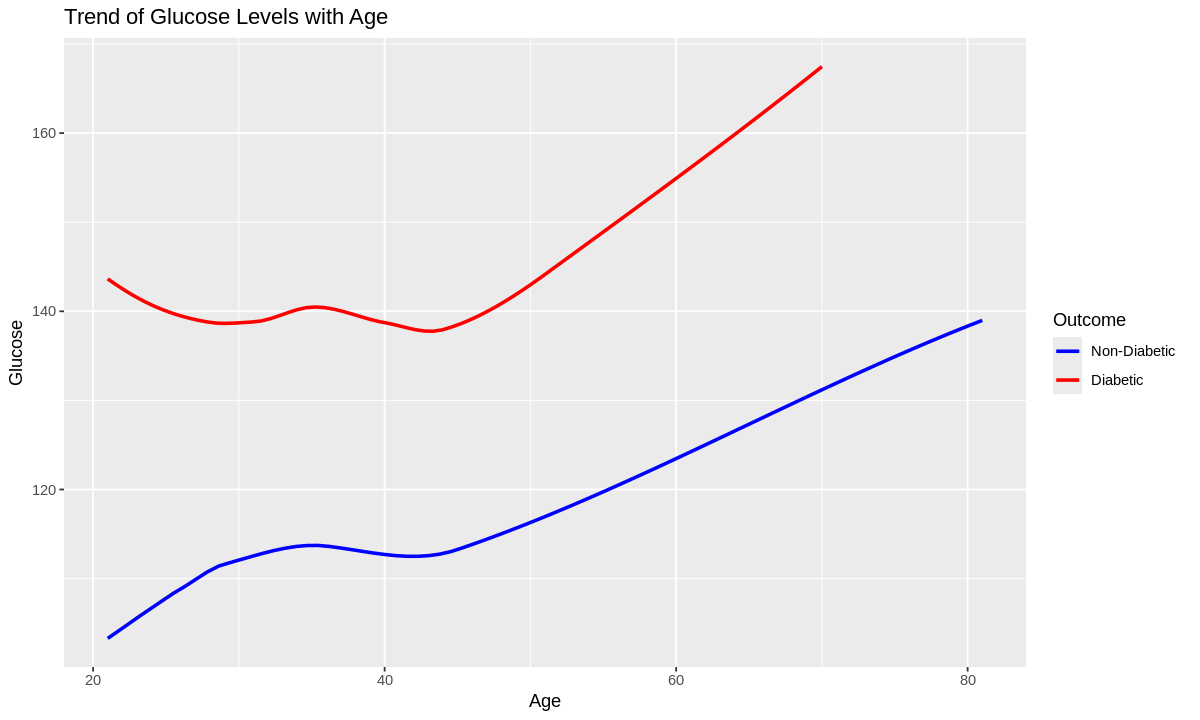

In [ ]:
ggplot(data, aes(x = Age, y = Glucose, color = Outcome)) +
  geom_smooth(se = FALSE) +
  labs(title = "Trend of Glucose Levels with Age", x = "Age", y = "Glucose") +
  scale_color_manual(values = c("Non-Diabetic" = "blue", "Diabetic" = "red"))

# **Part 2 : Answering Questions**







## **2.1  I answered the following questions by using the appropriate statistics and plots:**







### **Q1: Are higher glucose levels associated with a greater likelihood of diabetes?**



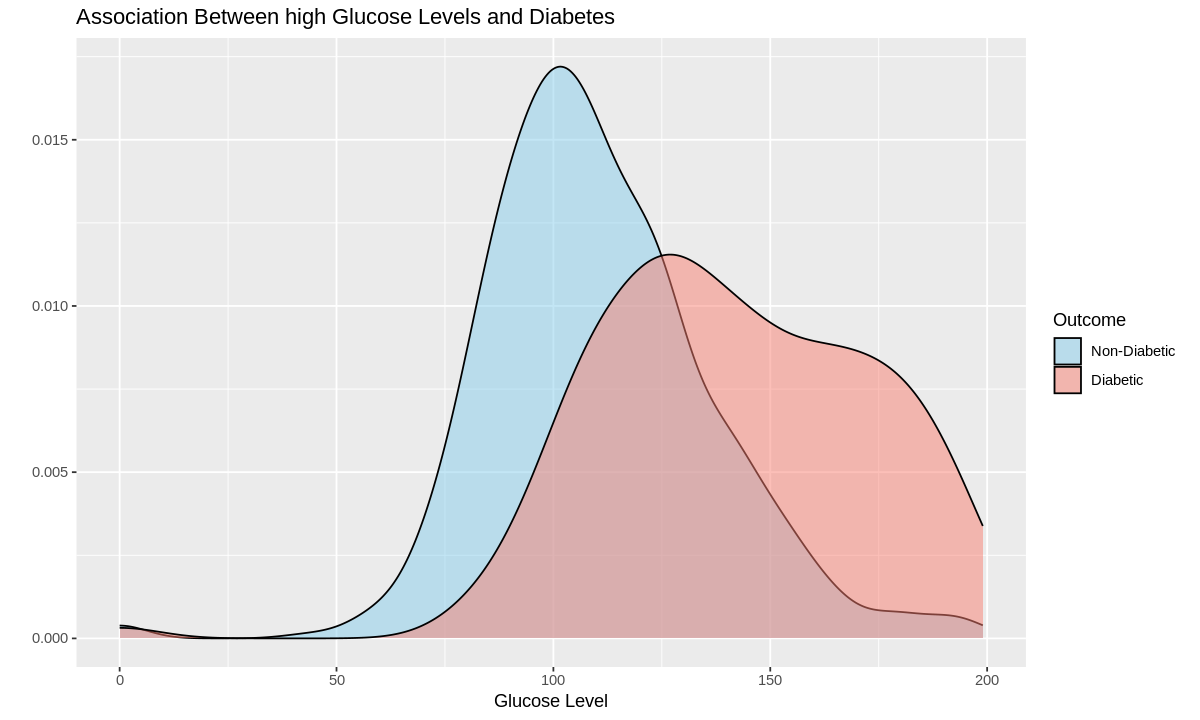

In [ ]:
# a plot shows the density of each the glucose and the outcome col
# to conclude the association between the high glucose levels with being diabetic
ggplot(data, aes(x = Glucose, fill = Outcome)) +
  geom_density(alpha = 0.5) +
  labs(title = "Association Between high Glucose Levels and Diabetes",
       x = "Glucose Level",
       y = "") +
  scale_fill_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "salmon"))

### ***Commentary:***
> *This density plot says that the glucose levels are strongly correlated with a diabetes diagnosis.
 The higher density of the Diabetic distribution at higher glucose levels suggests that patients with high glucpse levels are at risk for being diabetic*





## **Q2: Are patients with high glucose concentrations also likely to have higher BMI values?**

`geom_smooth()` using formula = 'y ~ x'


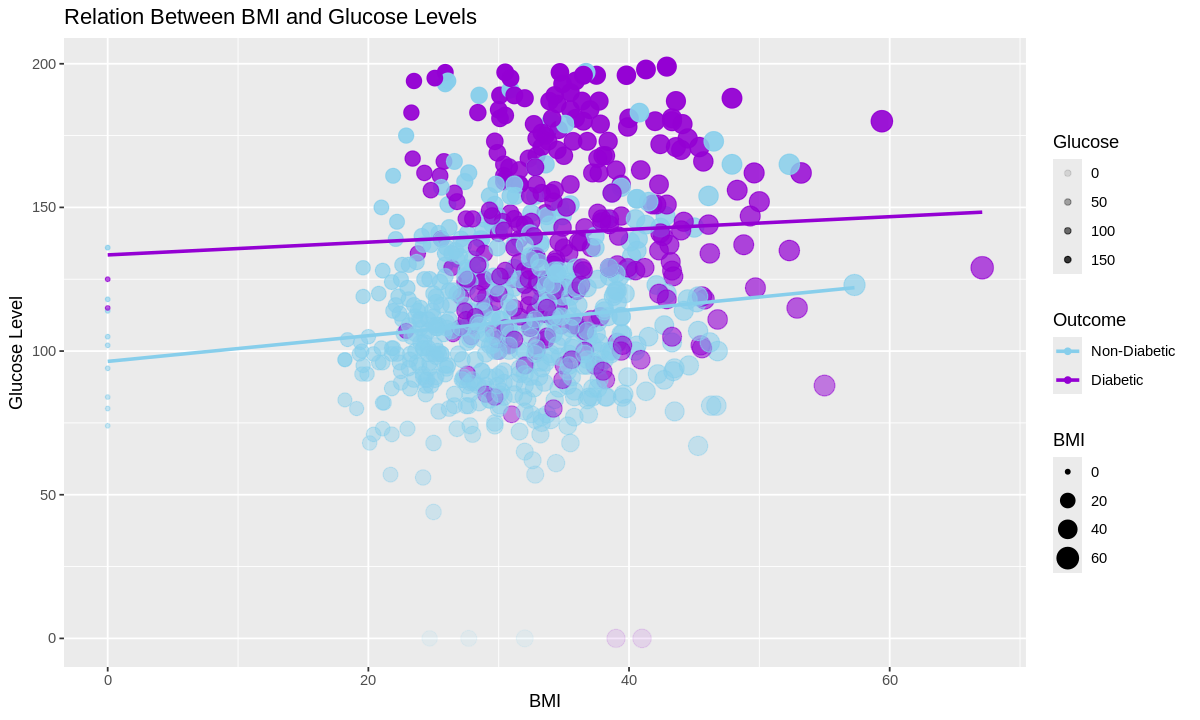

In [ ]:
# scatter plot that configures the relation bet. BMI and glucose levels with being diabetic or not
ggplot(data, aes(x = BMI, y = Glucose, color = Outcome)) +
    geom_point(aes(size = BMI, alpha = Glucose)) +
          geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Relation Between BMI and Glucose Levels",
         x = "BMI",
         y = "Glucose Level") +
    scale_color_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "darkviolet"))


### ***Commentary:***
> *The scatter plot reveals a weak association between BMI and glucose levels, but this relationship appears stronger for diabetic individuals(purple), since we can find that thers is a trend, when the BMI increase the glucose is high also.*







## **Q3: Are patients with a higher number of pregnancies at greater risk of developing diabetes?**



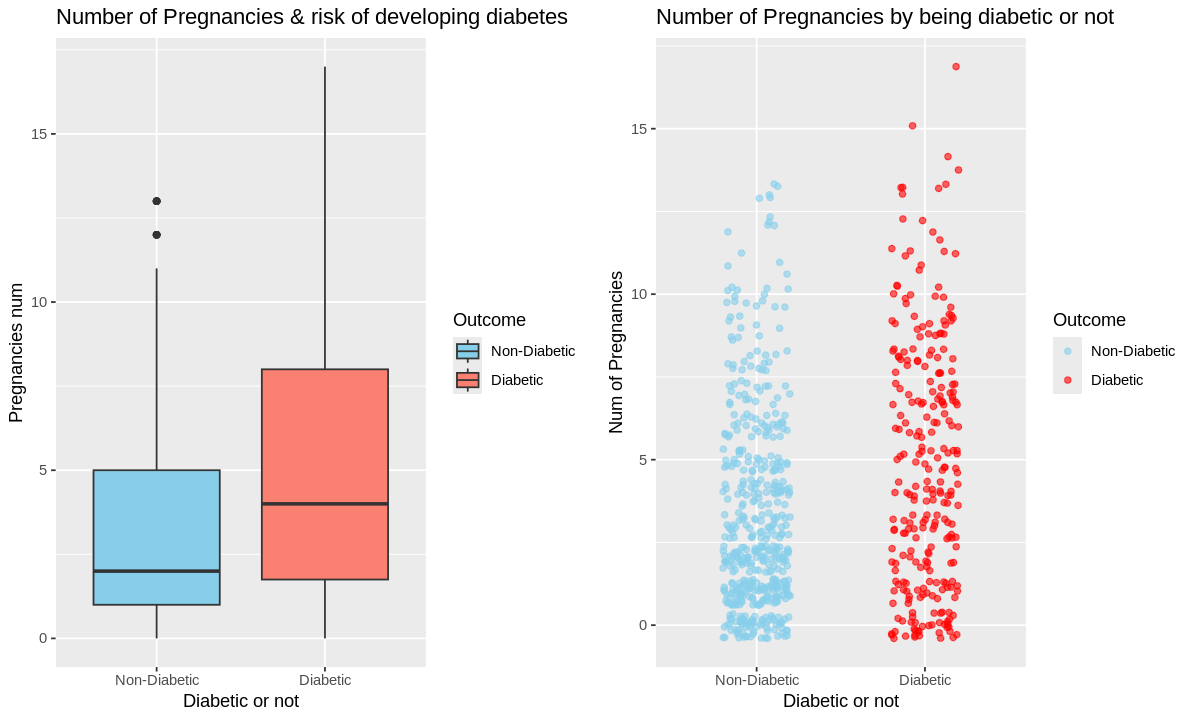

In [ ]:
# I answered this question using 2 plots, box plot and a jitter plot(bar plot), to show the relation between the num of being pregnant and the probability of being diabetic
p1 <- ggplot(data, aes(x = Outcome, y = Pregnancies, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Number of Pregnancies & risk of developing diabetes",
       x = "Diabetic or not",
       y = "Pregnancies num") +
  scale_fill_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "salmon"))
#--------------------------------------------------------------------------------------------
p2 <- ggplot(data, aes(x = Outcome, y = Pregnancies, color = Outcome)) +
    geom_jitter(width = 0.2, alpha = 0.6) +
    labs(title = "Number of Pregnancies by being diabetic or not",
         x = "Diabetic or not",
         y = "Num of Pregnancies") +
    scale_color_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "red"))

grid.arrange(p1, p2, ncol=2)

### ***Commentary:***
> *I have plotted 2 charts here, box plot and jitter plot, which both show a small trend towards diabetic women, although they are having a higher number of pregnancies, but the difference is not big, we can see an overlap between the two groups as shown in the box plot.*







## **Q4: Are older patients more likely to have higher insulin concentrations and blood glucose levels?**



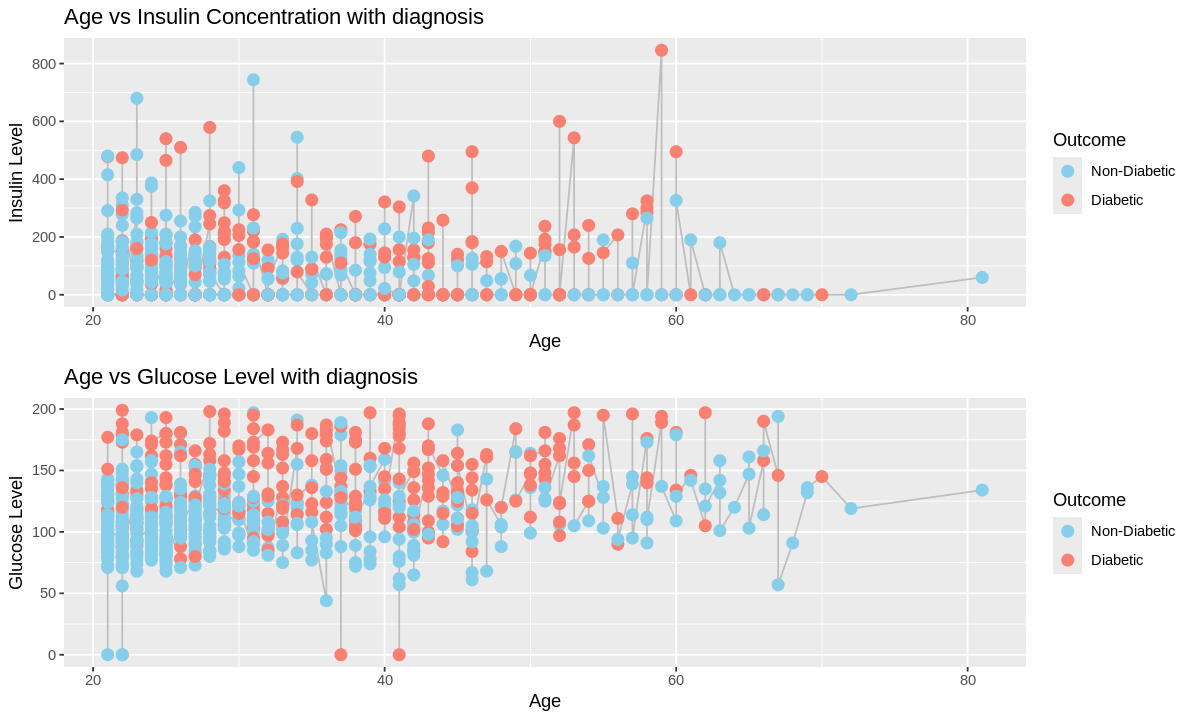

In [ ]:
# 2 scatter plots, one for the Age vs insulin, the other is for Age vs Glucose levels:
scatter1 = ggplot(data, aes(x = Age, y = Insulin, color = Outcome)) +
    geom_line( color="grey") +
  geom_point(alpha=1,size=3) +
  labs(title = "Age vs Insulin Concentration with diagnosis",
       x = "Age",
       y = "Insulin Level") +
  scale_color_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "salmon"))

scatter2 = ggplot(data, aes(x = Age, y = Glucose, color = Outcome)) +
   geom_line( color="grey") +
  geom_point(alpha=1,size=3) +
  labs(title = "Age vs Glucose Level with diagnosis",
       x = "Age",
       y = "Glucose Level") +
  scale_color_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "salmon"))

grid.arrange(scatter1, scatter2, nrow=2)

### ***Commentary:***
> *above are 2 scatter plots,  one illustrate an association between age vs insulin and the other for age vs glucose. It is obvious that there is a slight upward trend in the second chart in the glucose levels. For the fisrt chart, the more the patient is youngm the more insulin he has and no risk for being diabetic,However, both graphs show a large distribution of values, and the increase is not constant across ages. It is better to look for other factors that might answer this question in a moderate way*





## **Q5: Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?**



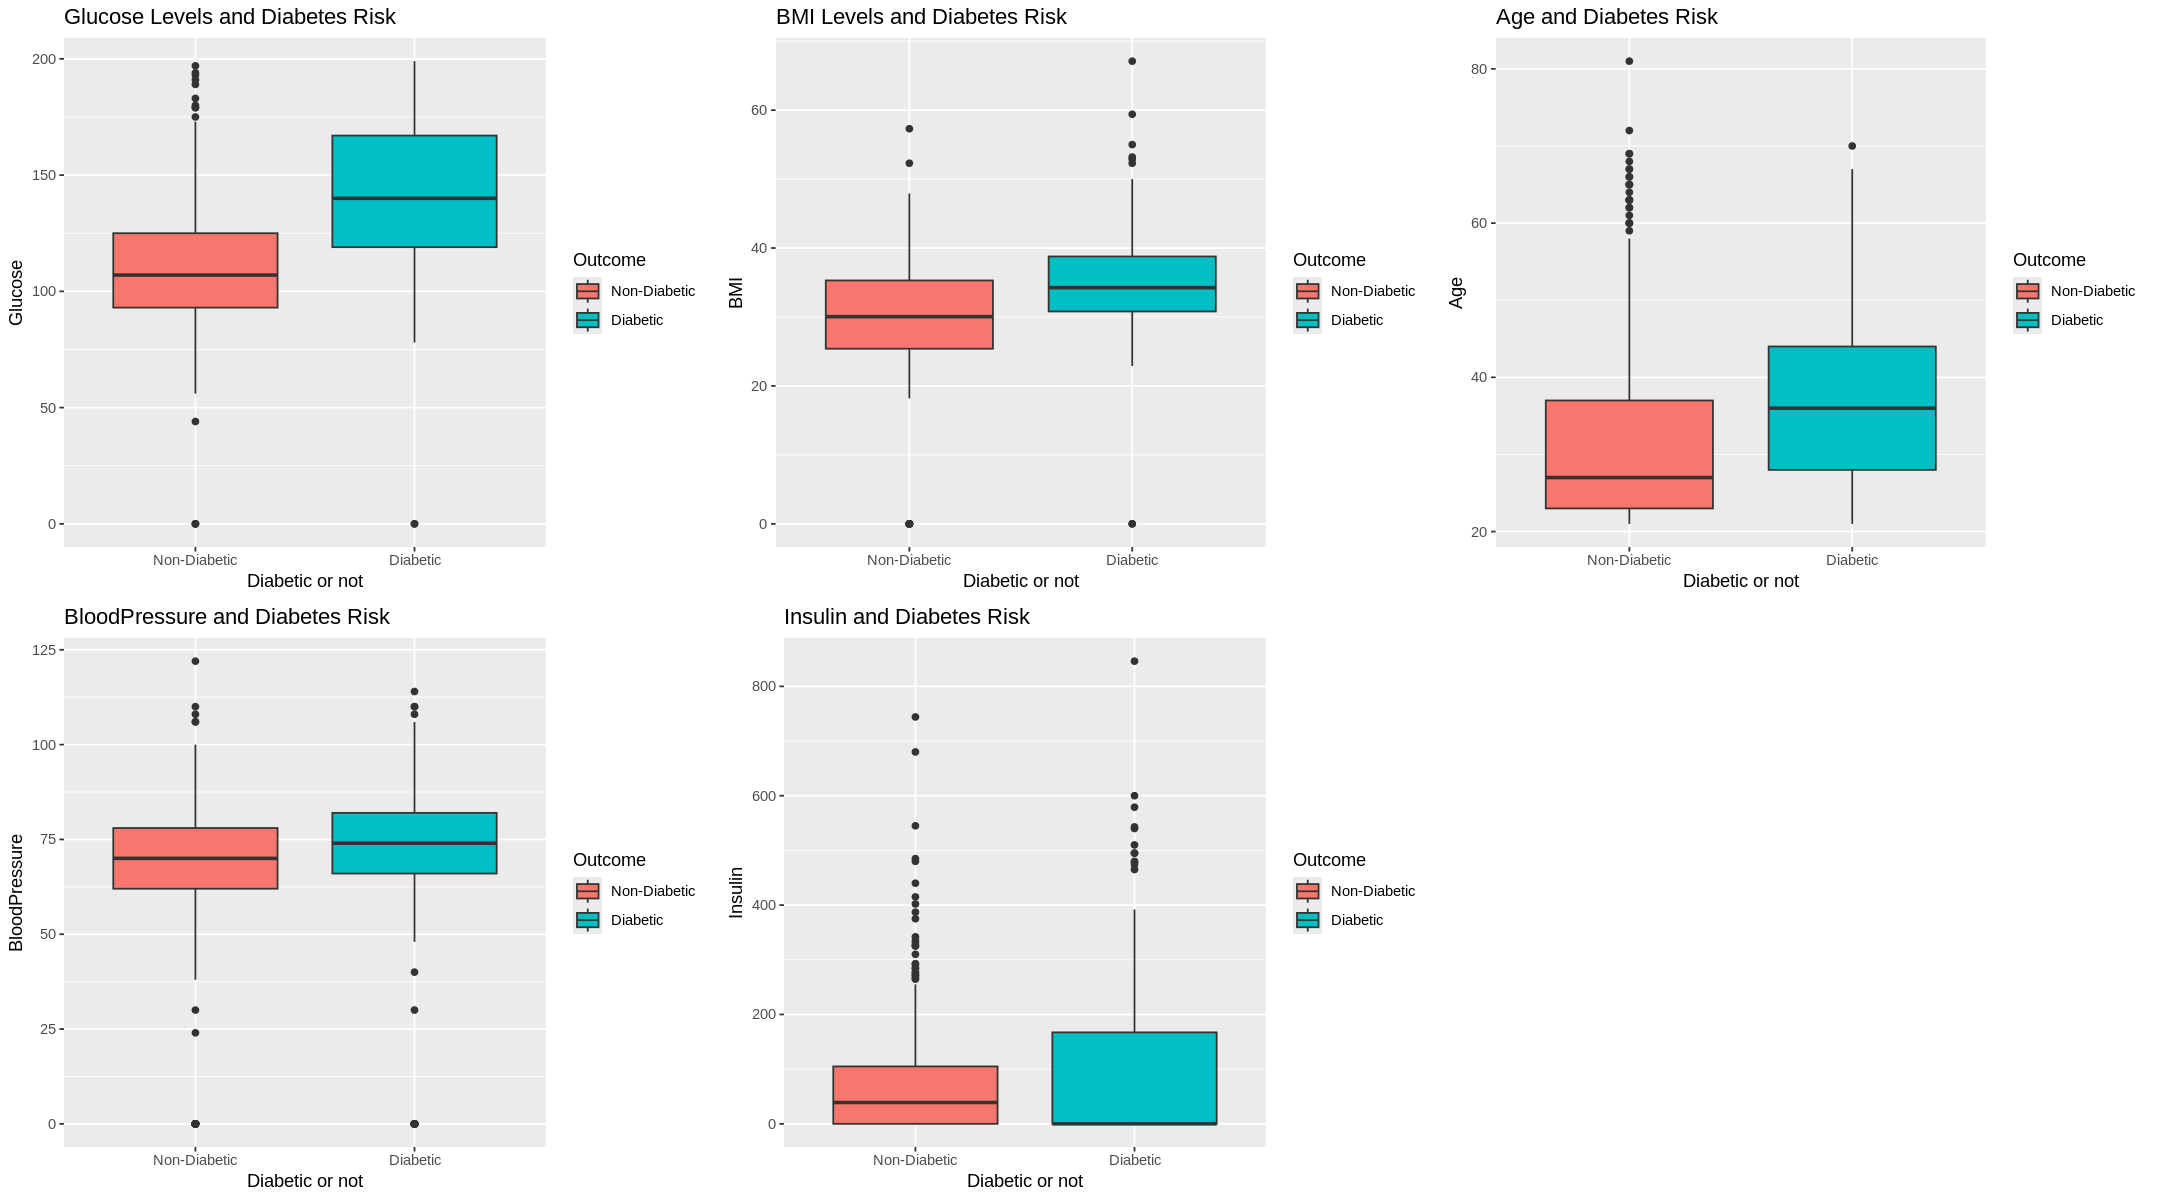

In [ ]:
#  below are 5 charts of boxplot each identify the relation between being diabetic or not with differnt key metrics, many(columns):
p1 = ggplot(data, aes(x = Outcome, y = Glucose, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Glucose Levels and Diabetes Risk", x = "Diabetic or not", y = "Glucose")

p2 = ggplot(data, aes(x = Outcome, y = BMI, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "BMI Levels and Diabetes Risk", x = "Diabetic or not", y = "BMI")

p3= ggplot(data, aes(x = Outcome, y = Age, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Age and Diabetes Risk", x = "Diabetic or not", y = "Age")

p4= ggplot(data, aes(x = Outcome, y = BloodPressure, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "BloodPressure and Diabetes Risk", x = "Diabetic or not", y = "BloodPressure")

p5= ggplot(data, aes(x = Outcome, y = Insulin, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Insulin vs Diabetes Risk", x = "Diabetic or not", y = "Insulin")

options(repr.plot.width = 18, repr.plot.height = 10)
grid.arrange(p1, p2,p3,p4, p5, ncol=3, nrow=2)


### ***Commentary:***
> *From the above charts we can obviously see that the most factors (key metric) that affect the probability of being diabetic is the glucose level and Insulin after it, while the higher values in BMI, age, and blood pressure are less distinctive*





##**2.2 Below are 5 more bivariate/multivariate analysis questions with answers for each with appropriate visuals and commentary:**


### 1. How does glucose relate to being diabetic across the different Blood Pressure Levels?



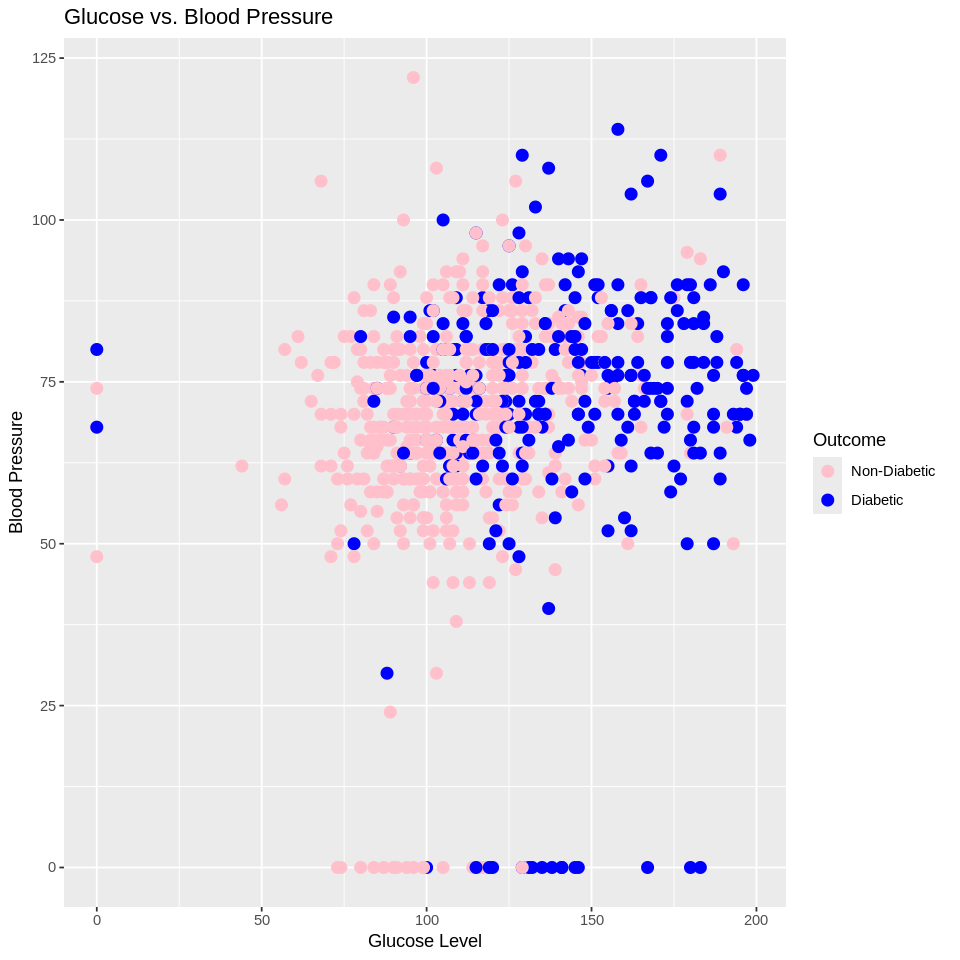

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
# below is a scatter plot that shows the relation between being diabetic with different blood pressure values:
ggplot(data, aes(x = Glucose, y = BloodPressure, color = Outcome)) +
  geom_point(alpha = 1, size=3) +
  labs(title = "Glucose vs. Blood Pressure",
       x = "Glucose Level",
       y = "Blood Pressure") +
  scale_color_manual(values = c("Non-Diabetic" = "pink", "Diabetic" = "blue"))


####***Commentary***

> *We can conclude that the higher glucose levels are, the more proboability of being diabtec across different blood pressure levels*


> *But it also indicates that blood pressure alone is not a reliable predictor of whether the patient has diabetes or not,  The large overlap between the blue (diabetic) and pink (non-diabetic) points across glucose levels says that the relationship between glucose levels and diabetes status is not triggered by blood pressure.*







### 2.  How Does the Average Blood Pressure Differ by Age Groups?



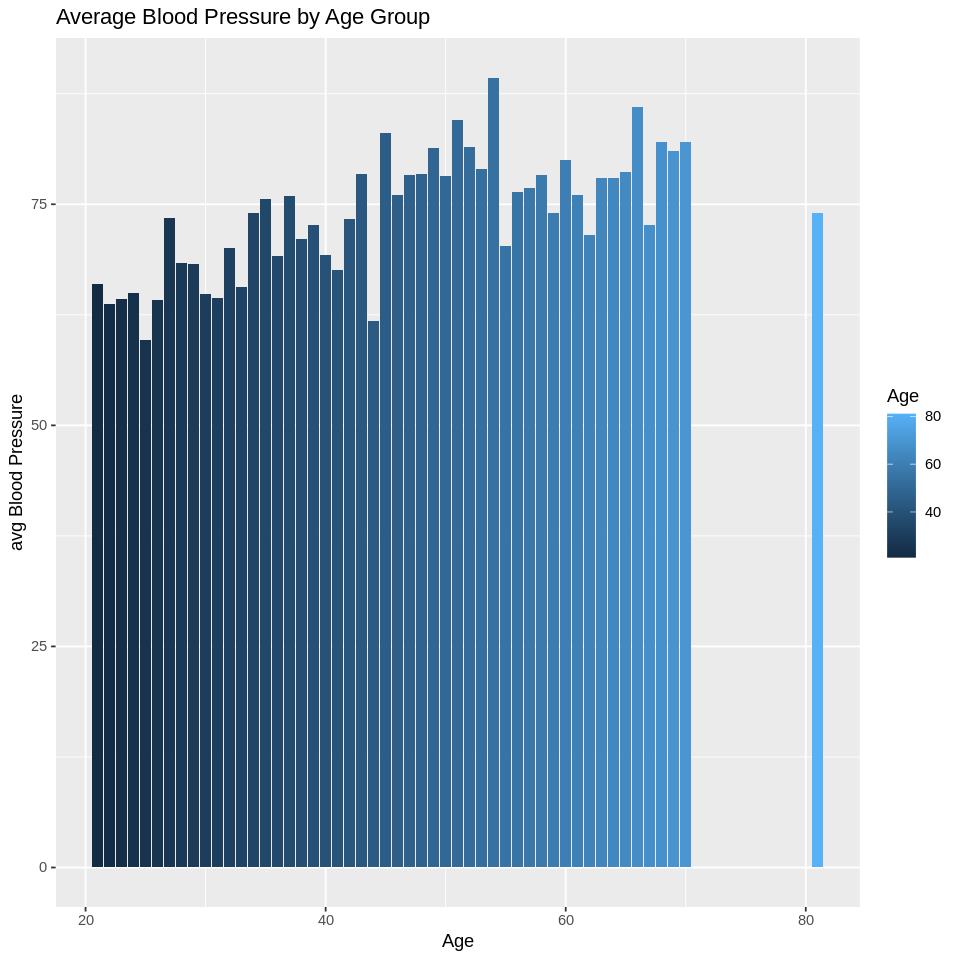

In [ ]:
# below is a  bar chart that demonstrates teh trend of increasing the average blood pressure with age
# first I grouped the data by age and calculated average blood pressure for each age group:
groupBy1 <- data %>%
  group_by(Age) %>%
  summarize(avgPressure = mean(BloodPressure, na.rm = TRUE))
#  then created a bar chart showing average blood pressure for each age
ggplot(groupBy1, aes(x = Age, y = avgPressure, fill = Age)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Blood Pressure by Age Group",
       x = "Age",
       y = "avg Blood Pressure")

### ***Commentary***

>*The visualization reveals that older individuals tend to have a higher average blood pressure, indicating that age could be a risk factor*






### 3. What is the Proportion of diabetic and non diabetic women according to the number of pregnancies?

`summarise()` has grouped output by 'pregnancy'. You can override using the
`.groups` argument.


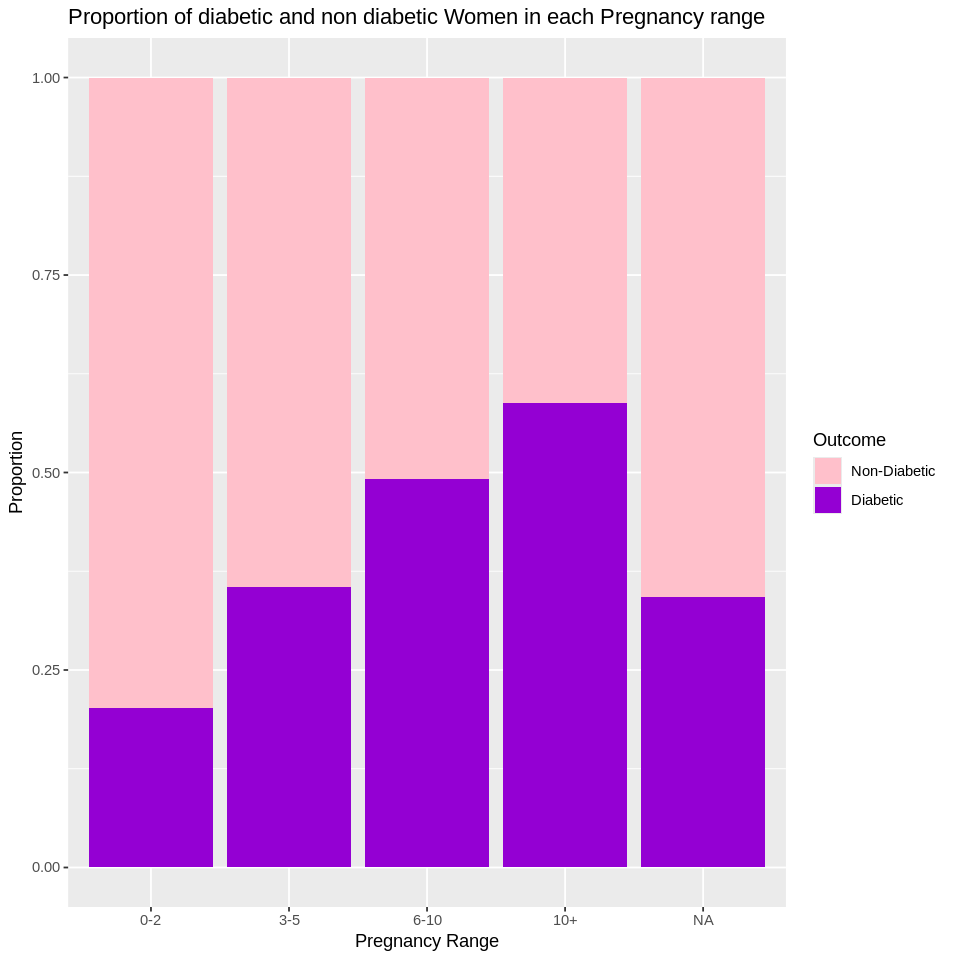

In [ ]:
# I first created pregnancy range groups and count within each outcome group:
groupby2 <- data %>%
  mutate(pregnancy = cut(Pregnancies, breaks = c(0, 2, 5, 10, Inf), labels = c("0-2", "3-5", "6-10", "10+"))) %>%
  group_by(pregnancy, Outcome) %>%
  summarize(Count = n())
# a bar chart of proportions by pregnancy range and colored by the outcome (diagnosis)
ggplot(groupby2, aes(x = pregnancy, y = Count, fill = Outcome)) +
  geom_bar(stat = "identity", position = "fill") +
  labs(title = "Proportion of diabetic and non diabetic Women in each Pregnancy range",
       x = "Pregnancy Range",
       y = "Proportion") +
  scale_fill_manual(values = c("Non-Diabetic" = "pink", "Diabetic" = "darkviolet"))


### ***Commentary***

>*The stacked bar chart shows that as the number of pregnancies increases, the proportion of diabetic women tends to increase as well.*

>The pink (non-diabetic) bars become smaller as pregnancies increase. However, the largest proportion of diabetic women seems to be the 3-5 group
Overall, this plot indicates that as the number of pregnancies increases, the chance of being diabetic increases, though there are exceptions as there are many other factors as well.






### 4.  Does the Skin Thickness distribution affect being diabetic or not?
this is a side-by-side histogram showing the distribution of Skin Thickness for diabetic and non-diabetic

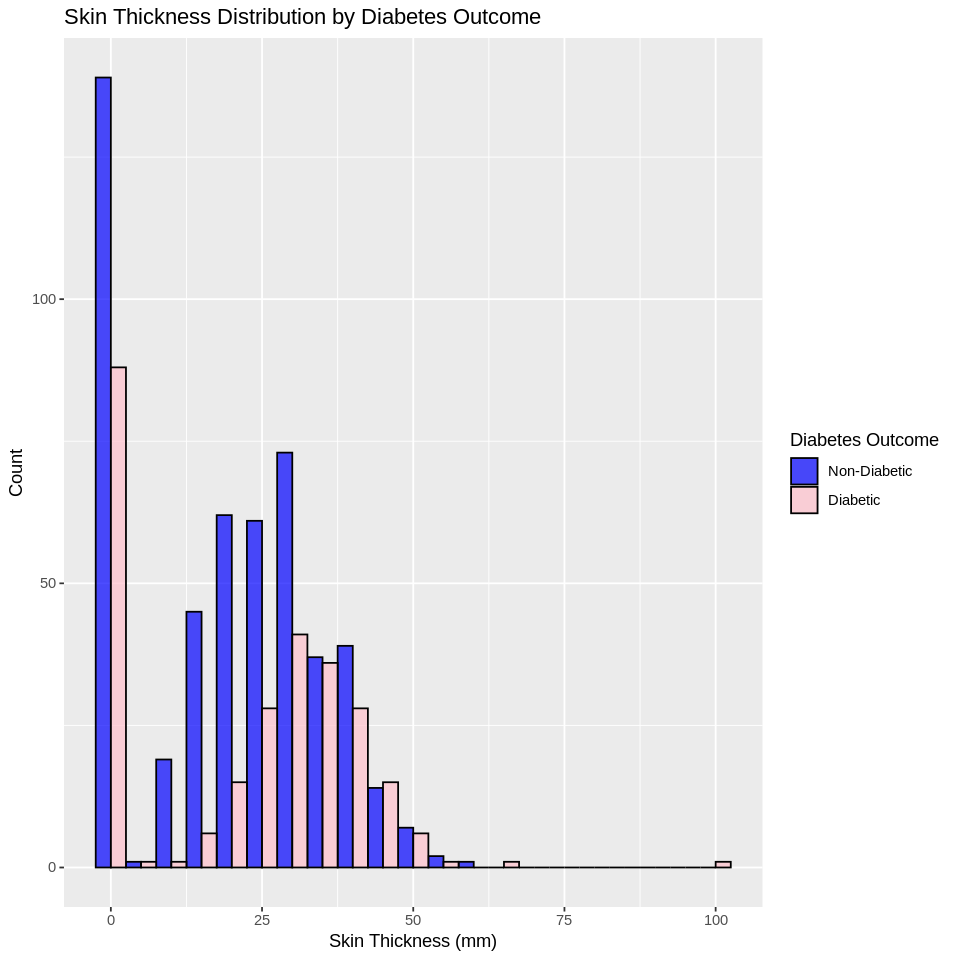

In [ ]:
# a histogram of skin thickness, grouped by diabetes outcome, showing skin thickness distribution for each outcome.
ggplot(data, aes(x = SkinThickness, fill = Outcome)) +
  geom_histogram(binwidth = 5, position = "dodge", alpha = 0.7, color = "black") +
  labs(title = "Skin Thickness Distribution by Diabetes Outcome",
       x = "Skin Thickness(mm)",
       y = "Count",
       fill = "Diabetes Outcome") +
  scale_fill_manual(values = c("Non-Diabetic" = "blue", "Diabetic" = "pink"))

### ***Commentary***

>*The side-by-side histogram shows a lot of the data is centered to the low skin thickness values. Although diabetic individuals are more likely to have a higher skin thickness, the graph shows an overlap.*

## **5. Is there a relationship between BMI categories and the number of pregnancies for diabetic women?**

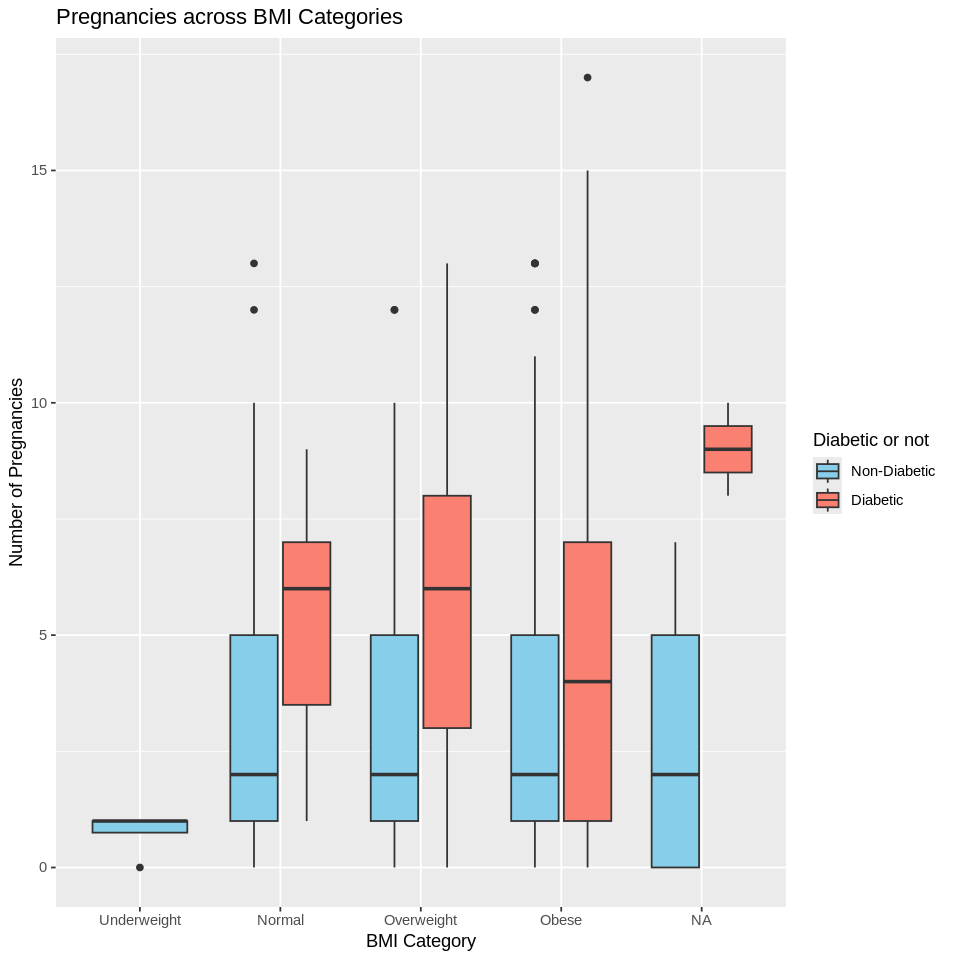

In [ ]:
# making 4 BMI categories -> underweight, normal, overweight and obese
# and put them in a new BMI_Category col.
data$BMI_Category <- cut(data$BMI,
                         breaks = c(0, 18.5, 25, 30, Inf),
                         labels = c("Underweight", "Normal", "Overweight", "Obese"))

# a box plot of pregnancies across BMI categories, colored by diabetes outcome.
ggplot(data, aes(x = BMI_Category, y = Pregnancies, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Pregnancies across BMI Categories",
       x = "BMI Category",
       y = "Number of Pregnancies",
       fill = "Diabetic or not") +
  scale_fill_manual(values = c("Non-Diabetic" = "skyblue", "Diabetic" = "salmon"))


### ***Commentary***

>*The box plots shows the relationship between BMI categories and the number of pregnancies, stratified by diabetes status. The distributions suggest that for diabetic patients, the number of pregnancies tend to be higher across all BMI categories, with the exception of the "underweight" category.*

> *The distribution of pregnancies is also higher in the "Obese" and "Overweight" categories for diabetic women*






# **Part 3: Hypothesis Testing**

**Using t-test in the code because we are compring between two independent groups (Diabetic and non-Diabetic)**

## **3.1**

Null Hypothesis (H0):No significant difference in glucose levels between diabetic and non-diabetic patients

ALternative Hypothesis (H1): There is a significant difference in glucose levels between diabetic and non-diabetic patients

In [ ]:
# Separating based on outcome
diabetic = subset(data, Outcome == "Diabetic")
non_diabetic = subset(data, Outcome == "Non-Diabetic")

alpha =0.05

In [ ]:
# Using glucose col and performin test using t-test
test= t.test(diabetic$Glucose,non_diabetic$Glucose)
print(test$p.value)

[1] 2.644161e-36


In [ ]:
# Conclusion of the results
if (test$p.value < 0.05) {
  print("We reject the null hypothesis. There is a significant difference in glucose levels between diabetic and non-diabetic patients.")
} else {
  print("We fail to reject the null hypothesis. There is no significant difference in glucose levels between diabetic and non-diabetic patients.")
}

[1] "We reject the null hypothesis. There is a significant difference in glucose levels between diabetic and non-diabetic patients."


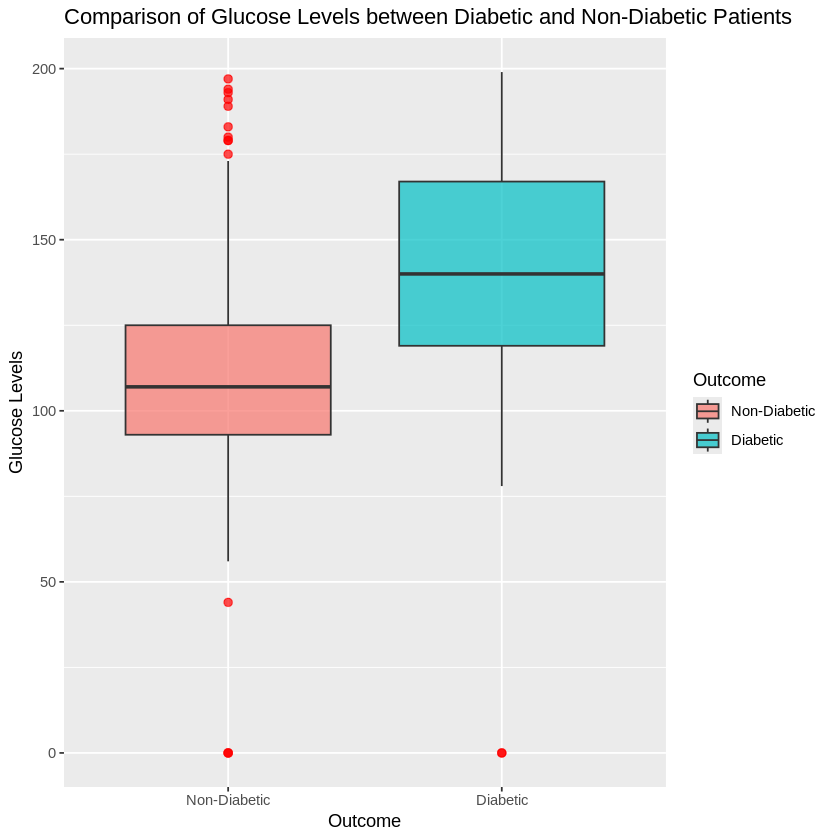

In [ ]:
# This visualization represent the gluscose level between the groups
ggplot(data, aes(x = Outcome, y = Glucose, fill = Outcome)) +
  geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.size = 2) +
  labs(
    title = "Comparison of Glucose Levels between Diabetic and Non-Diabetic Patients",
    x = "Outcome",
    y = "Glucose Levels"
  )

## **3.2**

Claim 2: "There is a significant difference in BMI levels between diabetic and non-diabetic patients.


Null Hypothesis (H0):No significant difference in BMI levels between diabetic and non-diabetic patients

ALternative Hypothesis (H1): There is a significant difference in BMI levels between diabetic and non-diabetic patients

In [ ]:
# Separating based on outcome
diabetic = subset(data, Outcome == "Diabetic")
non_diabetic = subset(data, Outcome == "Non-Diabetic")

alpha =0.05

In [ ]:
# Using BMI col and performin test using t-test
test_BMI= t.test(diabetic$BMI,non_diabetic$BMI)

print(test_BMI$p.value)

[1] 6.566238e-17


In [ ]:
# Conclusion of the results
if (test_BMI$p.value < 0.05) {
  print("We reject the null hypothesis. There is a significant difference in glucose levels between diabetic and non-diabetic patients.")
} else {
  print("We fail to reject the null hypothesis. There is no significant difference in glucose levels between diabetic and non-diabetic patients.")
}

[1] "We reject the null hypothesis. There is a significant difference in glucose levels between diabetic and non-diabetic patients."


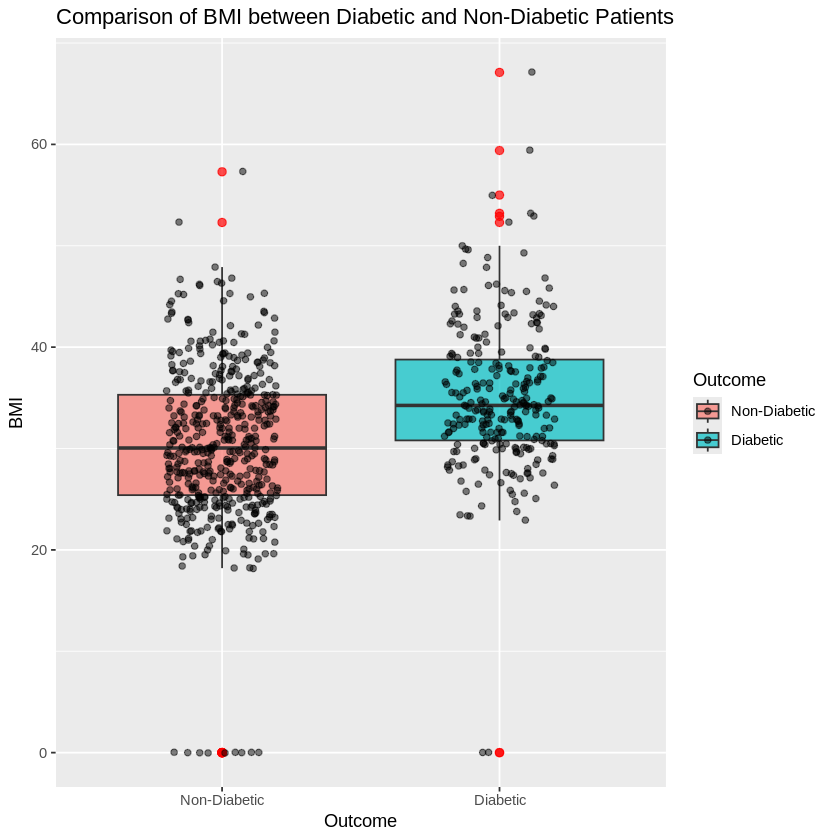

In [ ]:
# This visualization represent the BMI level between the groups
ggplot(data, aes(x = Outcome, y = BMI, fill = Outcome)) +
  geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.size = 2) +
  geom_jitter(width = 0.2, alpha = 0.5, color = "black") + # This line add all the indvidual points
  labs(
    title = "Comparison of BMI between Diabetic and Non-Diabetic Patients",
    x = "Outcome",
    y = "BMI"
  )

# **Part 4: Simulation Task**

## Helper functions

In [ ]:
# sampling function
generate_sample <- function(data, column, num_of_samples, size_of_sample){
  # empty list to put the samples in
  sample_list <- list()
  # genrate samples
  for(i in 1:num_of_samples){
    sample_list[[i]] <- sample(data[[column]], size = size_of_sample)

  }
    return(sample_list)
}

In [ ]:
# calculate mean of sample function
calculate_mean <- function(sample_list){
  # use apply to get the mean of each list in a list
  mean_list <-sapply(sample_list, mean)

  return(mean_list)
}

In [ ]:
# plotting function
plot_histogram_and_density <- function(mean_list){

  #histogram
  hist(mean_list, main = "hist for sample means", xlab = "glucose mean",
       col = "lightgreen", border = "black",breaks = 15)

  #density
  plot(density(mean_list), main = "density for sample means", xlab = "glucose mean")

}

In [ ]:
# calculate conf interval for one sample t
calculate_confidence_interval_for_one_t <- function(sample, sample_mean, sample_size, conf){
  # standered deviation calculation
  standered_deviation <- sd(sample)
  # degrees of freedom calculation
  degrees_of_freedom  = sample_size - 1
  # calculate from t table  of 95% conf interval
  t_score = qt(conf, degrees_of_freedom)

  # interval (lower < t < upper)
  ci_lower <- sample_mean - t_score * (standered_deviation / sqrt(sample_size))
  ci_upper <- sample_mean + t_score * (standered_deviation / sqrt(sample_size))

  return (list(ci_lower = ci_lower, ci_upper = ci_upper))

}

In [ ]:
# calculate conf interval for one sample z
calculate_confidence_interval_for_one_z <- function(sample, sample_mean, sample_size, conf){
  # standard deviation calculation
  standered_deviation <- sd(sample)

  # calculate the critical value
  z_score = qnorm(1 - (1 - conf) / 2)

  # interval (lower < z < upper)
  ci_lower <- sample_mean - z_score * (standered_deviation / sqrt(sample_size))
  ci_upper <- sample_mean + z_score * (standered_deviation / sqrt(sample_size))

  return (list(ci_lower = ci_lower, ci_upper = ci_upper))
}

In [ ]:
# calculate conf interval for list of samples
calculate_confidence_interval_for_list <- function(sample_list, length, mean_list, sample_size, conf,z_or_t = "z"){
  # empty list to store conf intervals in
  conf_list <- list()
  if(z_or_t == "t"){
    for(i in 1:length){
      conf_list[[i]] <- calculate_confidence_interval_for_one_t(sample_list[[i]], mean_list[[i]], sample_size, conf)
    }
  }else{
    for(i in 1:length){
      conf_list[[i]] <- calculate_confidence_interval_for_one_z(sample_list[[i]], mean_list[[i]], sample_size, conf)
    }
  }
  return (conf_list)
}

In [ ]:
# get count of confidence intervals that contain the true population mean
check_true_mean_in_confidence_intervals <- function(conf_intervals, true_mean) {
  # counter for how many intervals contain the true mean
  count <- 0

  for (i in 1:length(conf_intervals)) {
    ci_lower <- conf_intervals[[i]]$ci_lower
    ci_upper <- conf_intervals[[i]]$ci_upper

    # Check if between the lower and upper bounds
    if (true_mean >= ci_lower && true_mean <= ci_upper) {
      count <- count + 1
    }
  }
  return(count)
}

In [ ]:
plot_boxplot_with_true_mean <- function(mean_list, true_mean) {
  # create a box plot of the sample means
  boxplot(mean_list, horizontal = TRUE, col = "lightblue", main = "Box Plot of Sample Means",
          xlab = "Sample Means")

  # add a red dashed line for the true mean
  abline(v = true_mean, col = "red", lty = 2, lwd = 2)

  # add titles
  legend("topright", legend = "True Population Mean", col = "red", lty = 2, lwd = 2)
}


In [ ]:
plot_rejected_and_accepted_auc <- function(conf_interval, mean_list, true_mean) {
  # estimate the shape of graph
  kde <- density(mean_list)

  # plot the distribution
  plot(kde, type = "l", col = "black", lwd = 2,
       xlab = "Sample Mean", ylab = "Density",
       main = "Area Under Curve: Accepted vs Rejected Intervals")

  # fill areas under the curve for accepted and rejected confidence intervals
  for (i in seq_along(conf_interval)) {
    lower <- conf_interval[[i]]$ci_lower
    upper <- conf_interval[[i]]$ci_upper
    color <- ifelse(true_mean >= lower && true_mean <= upper, "green", "red")

    # highlight the area under the curve for the confidence interval
    polygon_x <- c(lower, seq(lower, upper, length.out = 100), upper)
    polygon_y <- c(0, approx(kde$x, kde$y, seq(lower, upper, length.out = 100))$y, 0)

    # combine in 1
    polygon(polygon_x, polygon_y, col = adjustcolor(color, alpha.f = 0.5), border = NA)
  }

  # add a vertical line for the true mean
  abline(v = true_mean, col = "blue", lwd = 2, lty = 2)

  # add titles
  legend("topright", legend = c("Contains True Mean", "Does Not Contain True Mean", "True Mean"),
         fill = c("green", "red", NA), border = c(NA, NA, NA),
         lty = c(NA, NA, 2), col = c(NA, NA, "blue"), bty = "n")
}

## 4.1    Take 25 Random Samples of Size 15 from the Dataset


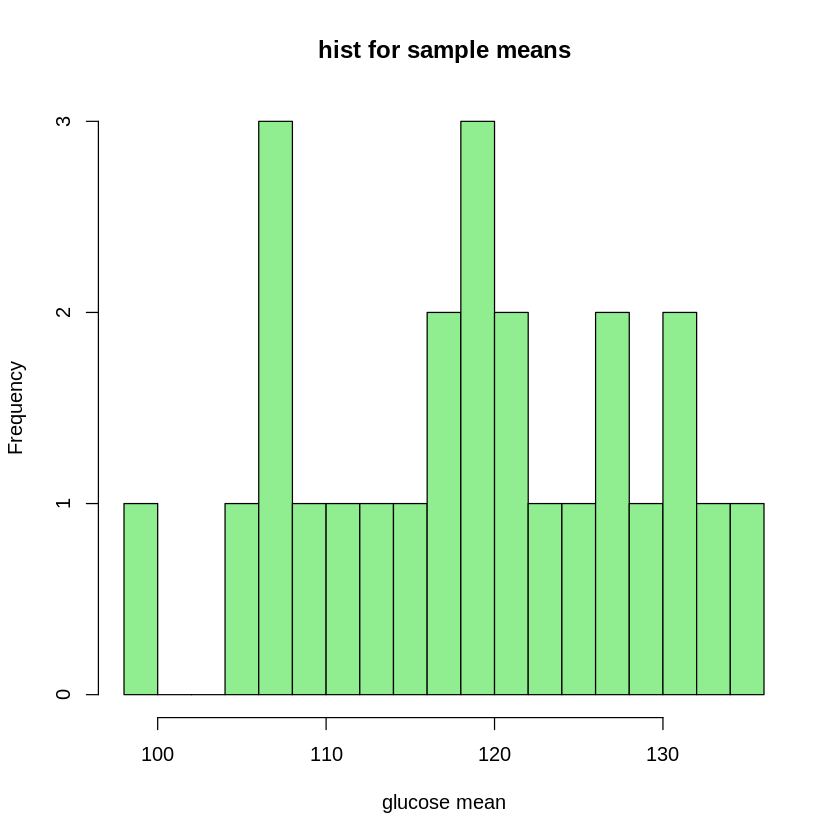

Count of true intervals: 22 out of  25 


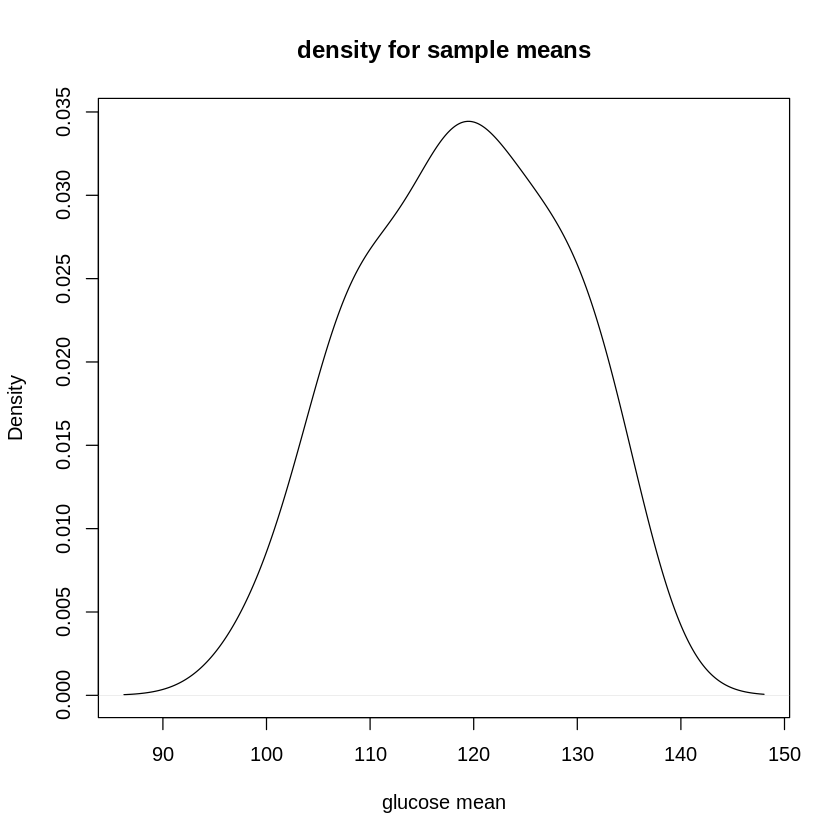

In [ ]:
# Select a relevant column from the dataset
# I choose Glucose

num_of_samples <- 25
size_of_sample <- 15
conf <- 0.95


# Generate 25 random samples of n = 15
genrated_samples = generate_sample(data, "Glucose", num_of_samples, size_of_sample)

# calculate the mean
mean_list = calculate_mean(genrated_samples)

# plot for visulaization
plot_histogram_and_density(mean_list)

# calculate confidence interval for the list
conf_interval <- calculate_confidence_interval_for_list(genrated_samples, num_of_samples, mean_list, size_of_sample, conf,"t")

# get true mean
true_mean <- mean(data$Glucose)

# contain the true population mean
true_count = check_true_mean_in_confidence_intervals(conf_interval, true_mean)
cat("Count of true intervals:", true_count, "out of ",length(conf_interval),"\n")


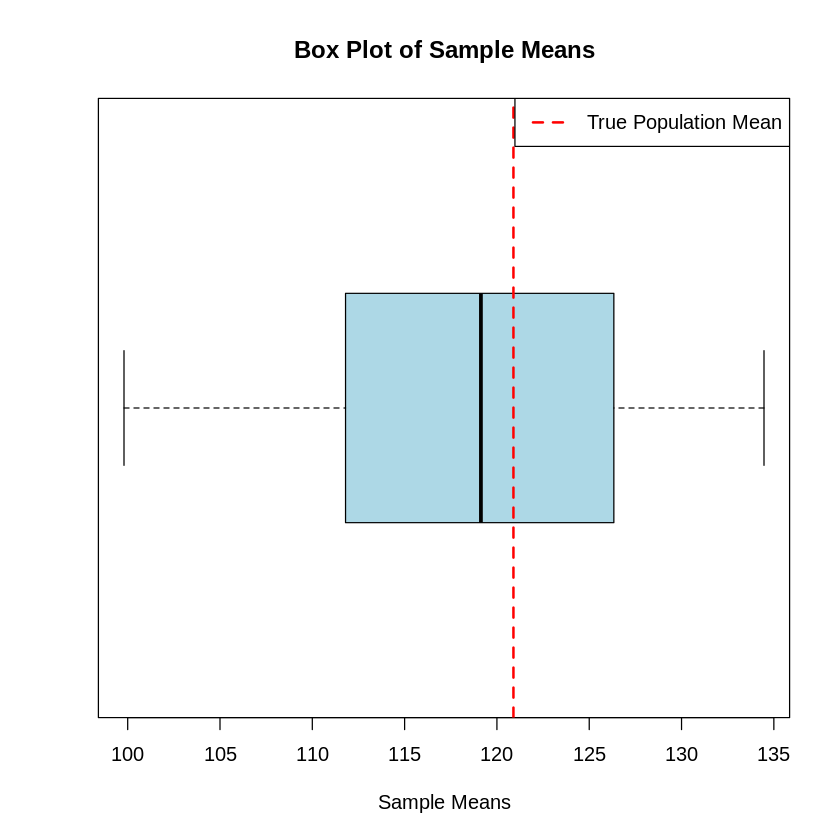

In [ ]:
#box plot for mean list
plot_boxplot_with_true_mean(mean_list, true_mean)


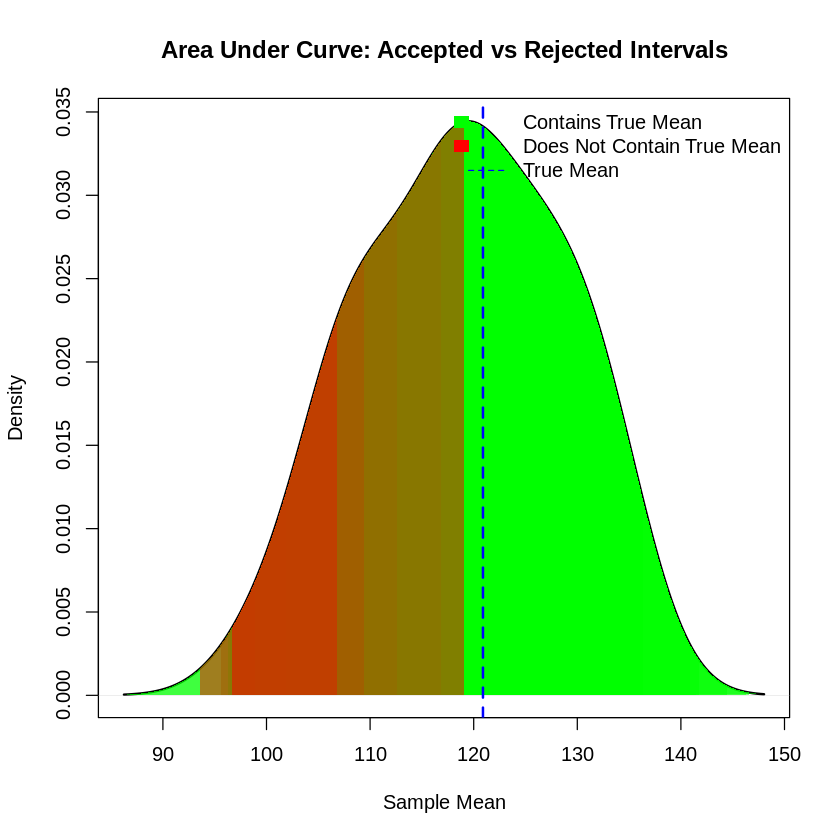

In [ ]:
#this shcow with green parts the accepted conf intervals and the red parts the rejected confs that doent contain the true meaan
plot_rejected_and_accepted_auc(conf_interval, mean_list, true_mean)


## 4.2    Increase the Sample Size to 100

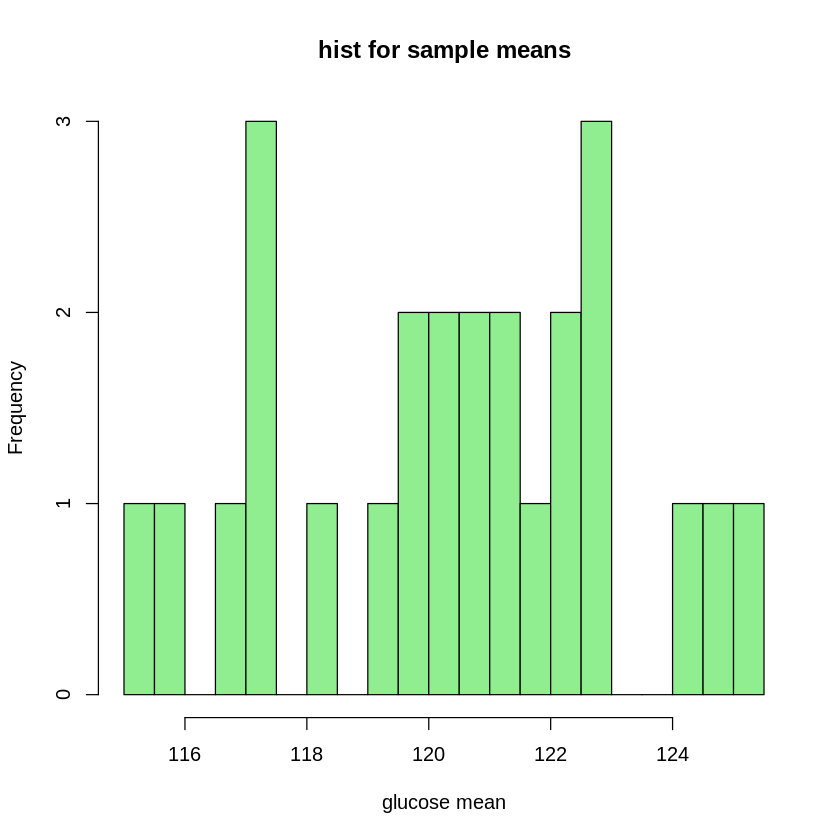

Count of true intervals: 25 out of  25 


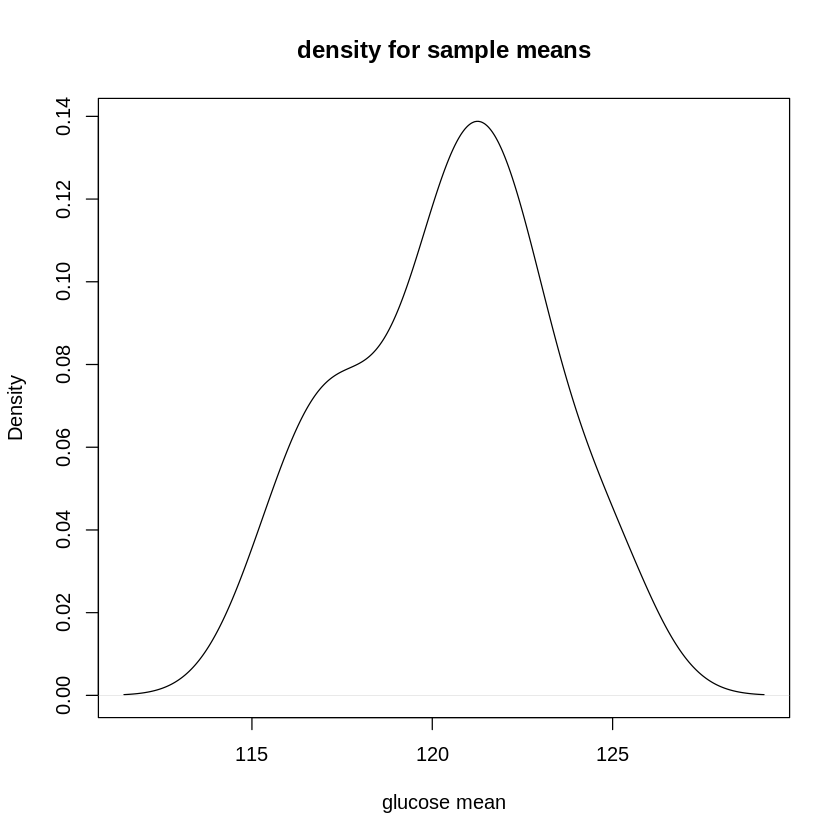

In [ ]:
# Select a relevant column from the dataset
# I choose Glucose

num_of_samples = 25
size_of_sample = 100
conf <- 0.95

# Generate 25 random samples of n = 100
genrated_samples = generate_sample(data, "Glucose", num_of_samples, size_of_sample)

# calculate the mean
mean_list = calculate_mean(genrated_samples)

# plot for visulaization
plot_histogram_and_density(mean_list)



# calculate confidence interval for the

conf_interval <- calculate_confidence_interval_for_list(genrated_samples, num_of_samples, mean_list, size_of_sample,conf)

# get true mean
true_mean <- mean(data$Glucose)

# contain the true population mean
true_count = check_true_mean_in_confidence_intervals(conf_interval, true_mean)
cat("Count of true intervals:", true_count, "out of ",length(conf_interval),"\n")


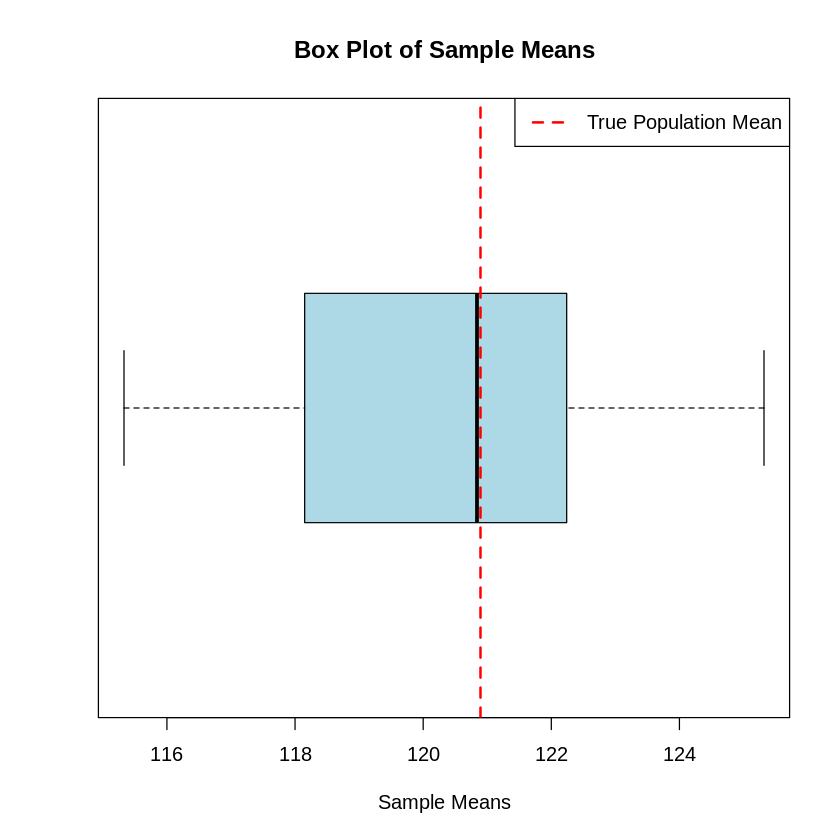

In [ ]:
#box plot for mean list
plot_boxplot_with_true_mean(mean_list, true_mean)


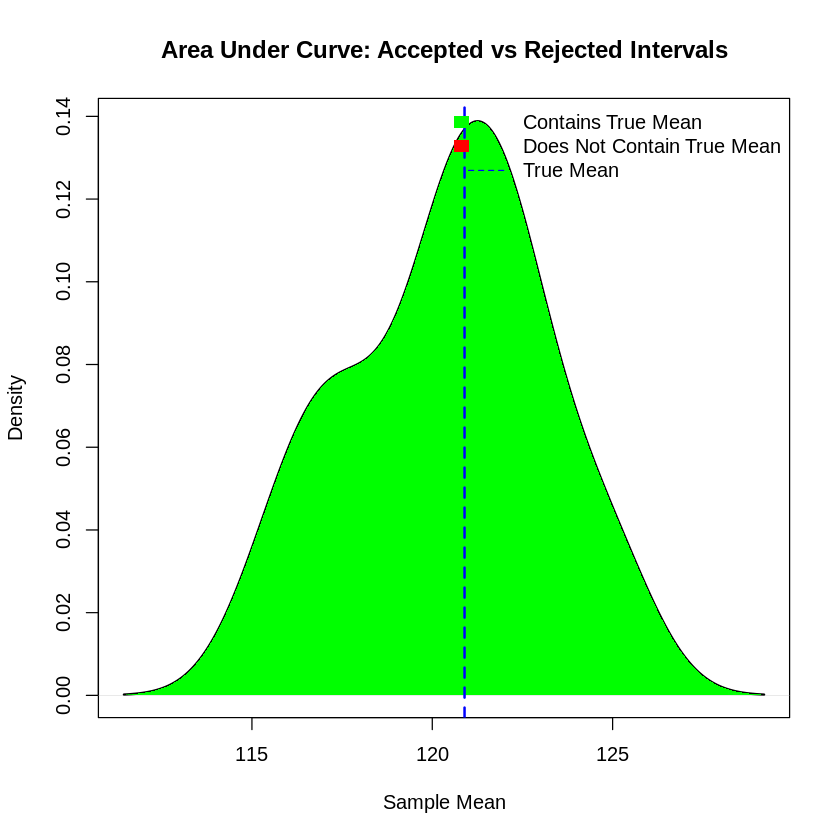

In [ ]:
#this show with green parts the accepted conf intervals and the red parts the rejected confs that doent contain the true meaan
plot_rejected_and_accepted_auc(conf_interval, mean_list, true_mean)


### answers

- Does the width of the confidence intervals increase or decrease?
    - the width in 100 is smaller

- Does increasing the sample size result in more or fewer intervals containing the true population mean?
  - more intervals in 100 contains the true population mean as it gets more accurate on increasing observations


### conclusion
-- of sample 15:

- 22 out of 25 (88%) of the confidence intervals contained the true population mean.

- smaller number of sample size have greater sampling error


-- of sample 100:

- when I increased the sample size to 100, 25 out of 25 (100%) of the confidence intervals contained the true population mean.

- with a larger sample size, the sample mean is more likely to be close to the actual mean.

- increasing the sample size improves the accuracy and reliability of the confidence intervals.


--and:
  - with larger sample sizes, the proportion of confidence intervals containing the true population mean increases. this is according to the Central Limit Theorem logical, as sample size increases, the sample mean becomes more normally distributed and really close to the population mean more closely.



##  4.3    Take 20 Random Samples of Size 10 from the Dataset

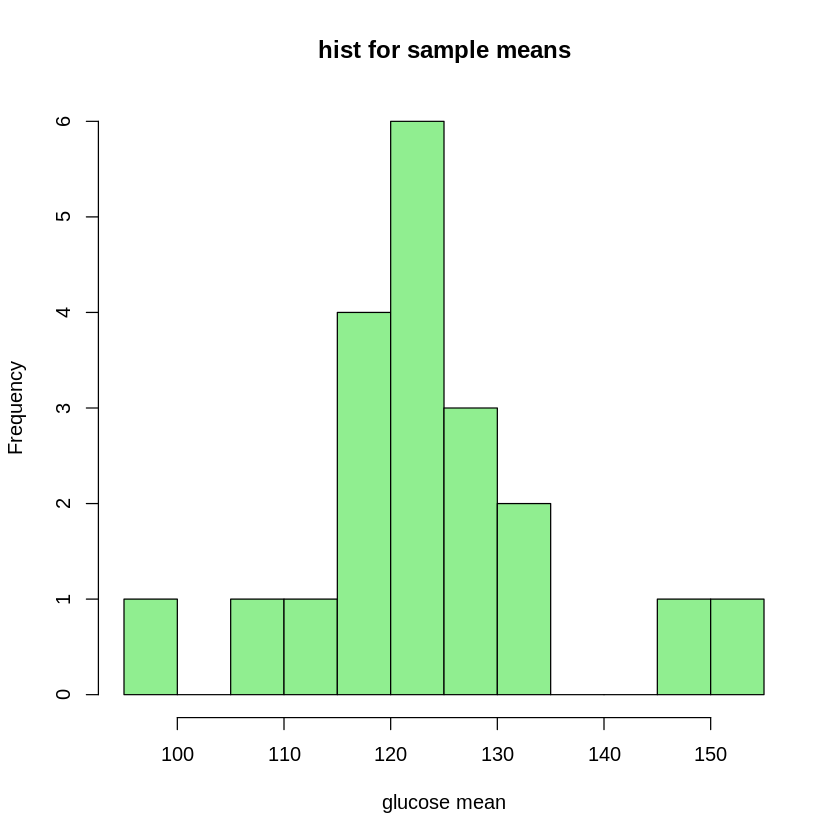

Count of true intervals: 17 out of  20 
coverage proportion: 0.85 


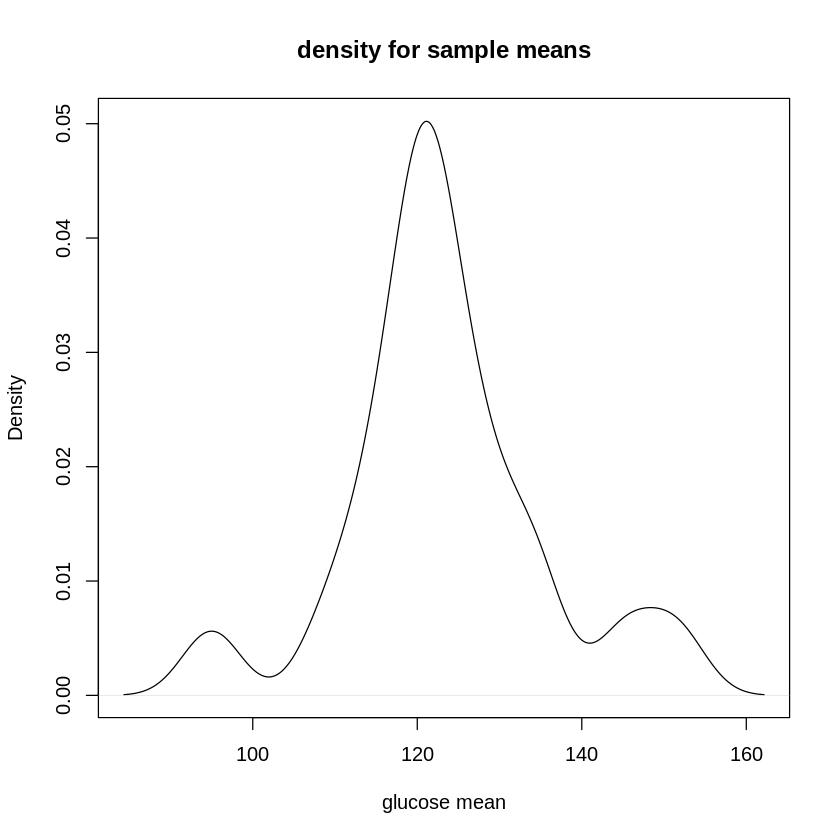

In [ ]:
# Select a relevant column from the dataset
# I choose Glucose

num_of_samples = 20
size_of_sample = 10
conf <- 0.95

# Generate 20 random samples of n = 10
genrated_samples = generate_sample(data, "Glucose", num_of_samples, size_of_sample)

# calculate the mean
mean_list = calculate_mean(genrated_samples)

# plot for visulaization
plot_histogram_and_density(mean_list)

# calculate confidence interval for the list
conf_interval <- calculate_confidence_interval_for_list(genrated_samples, num_of_samples, mean_list, size_of_sample,conf,"t")

# get true mean
true_mean <- mean(data$Glucose)

# contain the true population mean
true_count = check_true_mean_in_confidence_intervals(conf_interval, true_mean)
cat("Count of true intervals:", true_count, "out of ",length(conf_interval),"\n")
cat("coverage proportion:", true_count/length(conf_interval),"\n")



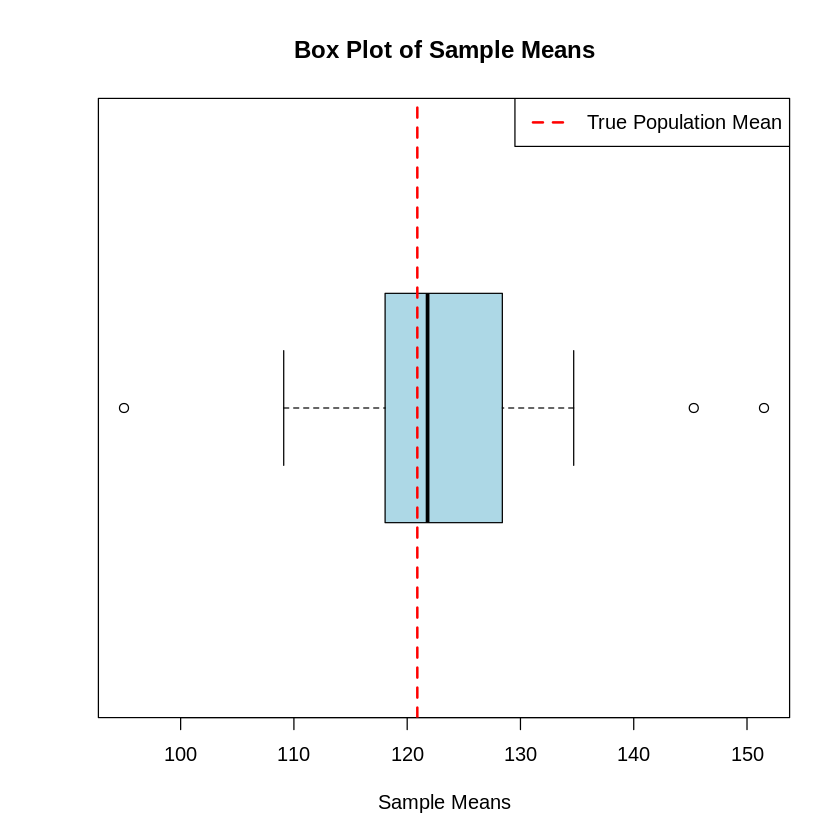

In [ ]:
#box plot for mean list
plot_boxplot_with_true_mean(mean_list, true_mean)


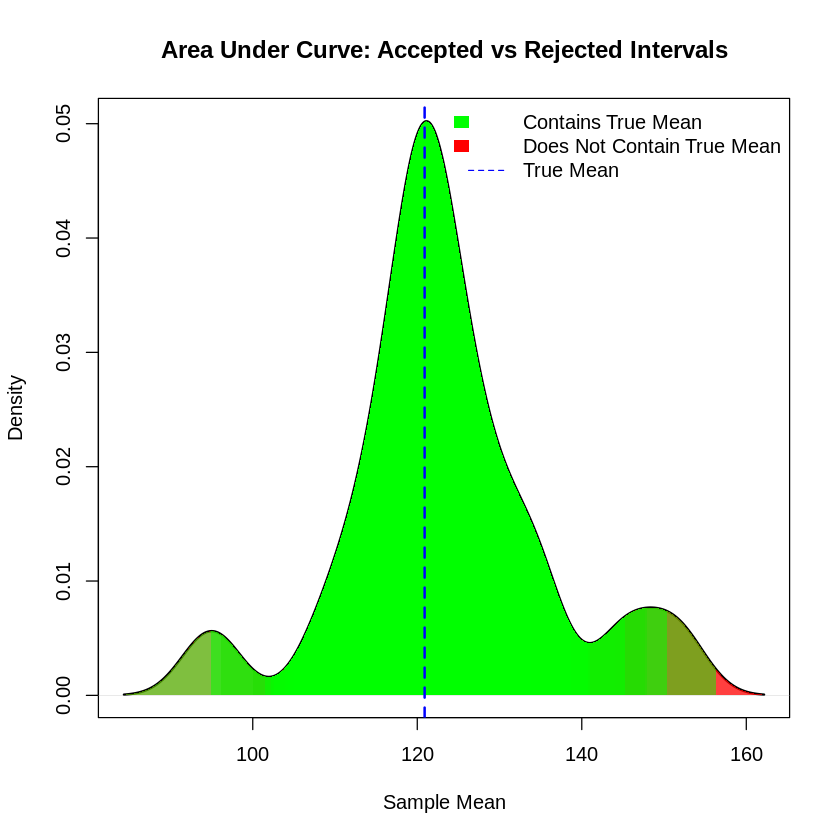

In [ ]:
#this show with green parts the accepted conf intervals and the red parts the rejected confs that doent contain the true meaan
plot_rejected_and_accepted_auc(conf_interval, mean_list, true_mean)


### analysis
- Sample size 10: Coverage proportion is 0.85 (17 out of 20)
- Sample size 100: Coverage proportion is 1.00 (25 out of 25)
- Sample size 25: Coverage proportion is 0.96 (24 out of 25)

-- from the data, we observe that as the sample size increases, the coverage proportion also increases. this indicates that larger sample sizes tend to have more accurate confidence intervals.

--  smaller sample sizes contain varaity, carrying less information about the population so  smaller sample sizes will produce wider confidence intervals that are less precise, and may not contain the true value of the parameter.

-- larger sample sizes are less variable and always more informative about the population, corresponding to smlller and more precise confidence intervals which are more likely to contain the true value of the parameter.




# **Resources:**
###[R -Graph-Gallery](https://r-graph-gallery.com/)